In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [4]:
def plot_feature_vs_target(data, feature_col, target_col):
    data = data.copy()
    groups = data[target_col].unique()

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"Distribution of {feature_col} by {target_col}", fontsize=16)

    # Histogram + KDE
    ax = axes[0,0]
    sns.histplot(data, x=feature_col, hue=target_col, kde=True,
                 element="step", stat="density", common_norm=False, ax=ax, palette="Set1")
    for g in groups:
        vals = data.loc[data[target_col] == g, feature_col].dropna()
        ax.axvline(vals.mean(), linestyle="--", label=f"Mean (target={g}): {vals.mean():.2f}")
        ax.axvline(vals.median(), linestyle=":", label=f"Median (target={g}): {vals.median():.2f}")
    ax.legend()
    ax.set_title("Histogram + KDE with mean/median")

    # Boxplot
    sns.boxplot(data=data, x=target_col, y=feature_col, hue=target_col,
                palette="Set2", showmeans=True, ax=axes[0,1])
    axes[0,1].set_title("Boxplot")

    # Violin plot
    sns.violinplot(data=data, x=target_col, y=feature_col, hue=target_col,
                   palette="Set2", inner="box", density_norm="count",ax=axes[0,2])
    axes[0,2].set_title("Violin Plot")

    # Barplot
    sns.barplot(data=data, x=target_col, y=feature_col, hue=target_col,
                estimator="mean", errorbar="se", palette="Set2", ax=axes[1,0])
    axes[1,0].set_title("Mean ± SE")

    # Q-Q plot
    for g in groups:
        sample = data.loc[data[target_col]==g, feature_col].dropna()
        stats.probplot(sample, dist="norm", plot=axes[1,1])
    axes[1,1].set_title("Q-Q Plot (per group)")

    # Strip plot
    sns.stripplot(data=data, x=target_col, y=feature_col, hue=target_col,
                  palette="Set2", alpha=0.6, jitter=True, ax=axes[1,2])
    axes[1,2].set_title("Strip Plot")

    plt.tight_layout()
    plt.show()


In [5]:
df = pd.read_csv('bank_loan.csv')
df.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
0,2072-08-01,22,63052,631,Employed,Master,2,18271,12,Married,...,5254.333333,0.639338,3.0,1409,0.167771,0.156702,1654.893043,0.397366,51.0,0
1,2068-04-14,42,62117,522,Employed,Associate,20,29281,108,Divorced,...,5176.416667,0.835783,5.0,106328,0.313281,0.294022,774.117592,0.190888,50.0,0
2,2062-04-07,31,32448,544,Employed,Bachelor,5,33395,60,Divorced,...,2704.000000,0.879069,3.0,8626,0.266395,0.286945,1053.817922,0.531368,54.0,0
3,2031-05-29,19,32182,478,Unemployed,Master,0,49105,24,Single,...,2681.833333,0.868833,7.0,96744,0.285105,0.247245,2614.025710,1.125732,53.0,0
4,2024-04-04,45,77191,646,Employed,Master,21,99655,24,Married,...,6432.583333,0.982722,8.0,16312,0.251655,0.256010,5348.835792,0.924642,52.0,0
5,2047-04-28,33,65873,557,Employed,High School,7,19659,96,Single,...,5489.416667,0.915246,5.0,222388,0.276159,0.273136,505.756751,0.137311,49.0,0
6,2032-09-16,26,53062,541,Employed,High School,4,30742,48,Single,...,4421.833333,0.736825,5.0,6749,0.255242,0.208924,950.169902,0.317101,56.0,0
7,2037-07-26,47,99221,566,Employed,Associate,28,21627,60,Single,...,8268.416667,0.785927,3.0,154698,0.243627,0.223010,601.021712,0.135337,41.6,1
8,2066-03-18,21,15000,573,Employed,Bachelor,0,29320,96,Single,...,1250.000000,0.707809,4.0,41112,0.277820,0.275320,758.657448,1.026926,51.0,0
9,2064-04-02,28,46213,601,Employed,Associate,7,17255,84,Single,...,3851.083333,0.798075,7.0,72669,0.241755,0.210898,394.570618,0.204247,47.0,0


<h2>Banking Loan Dataset Variables</h2>
<h3>The banking loan dataset consists of 2050 records of data in 36 distinct columns(variables) which can be divided into 5 main categories as such <h3>
<h3>Applicant's Personal & Employment Details</h3>
    <ul>
        <li><b>ApplicationDate:</b> The date the loan application was submitted.</li>
        <li><b>Age:</b> The applicant's age in years.</li>
        <li><b>MaritalStatus:</b> The applicant's marital status (e.g., 'Single', 'Married').</li>
        <li><b>NumberOfDependents:</b> How many people rely on the applicant financially.</li>
        <li><b>EducationLevel:</b> The highest level of education the applicant has completed.</li>
        <li><b>EmploymentStatus:</b> The applicant's current employment situation (e.g., 'Employed', 'Self-employed').</li>
        <li><b>Experience:</b> The applicant's total years of professional experience.</li>
        <li><b>JobTenure:</b> How long the applicant has been at their current job, usually in years.</li>
        <li><b>HomeOwnershipStatus:</b> Whether the applicant rents, owns their home, or has a mortgage.</li>
    </ul>

<h3>Applicant's Financial Profile</h3>
    <ul>
        <li><b>AnnualIncome:</b> The total income the applicant earns in a year before taxes.</li>
        <li><b>MonthlyIncome:</b> The total income the applicant earns in a month before taxes.</li>
        <li><b>SavingsAccountBalance:</b> The total amount of money in the applicant's savings account.</li>
        <li><b>CheckingAccountBalance:</b> The total amount of money in the applicant's checking account.</li>
        <li><b>TotalAssets:</b> The total value of everything the applicant owns (cash, investments, property).</li>
        <li><b>TotalLiabilities:</b> The total amount of debt the applicant owes (other loans, credit card debt).</li>
        <li><b>NetWorth:</b> The applicant's total assets minus their total liabilities.</li>
        <li><b>MonthlyDebtPayments:</b> The total amount the applicant pays towards existing debts each month.</li>
    </ul>

<h3>Applicant's Credit History</h3>
    <ul>
        <li><b>CreditScore:</b> A number representing the applicant's creditworthiness.</li>
        <li><b>LengthOfCreditHistory:</b> How many years the applicant has been using credit.</li>
        <li><b>NumberOfOpenCreditLines:</b> The total number of active credit accounts the applicant has.</li>
        <li><b>CreditCardUtilizationRate:</b> The percentage of the applicant's total available credit that they are currently using.</li>
        <li><b>NumberOfCreditInquiries:</b> How many times lenders have formally checked the applicant's credit history recently.</li>
        <li><b>BankruptcyHistory:</b> Whether the applicant has ever declared bankruptcy.</li>
        <li><b>PreviousLoanDefaults:</b> The number of times the applicant has failed to repay a loan in the past.</li>
        <li><b>PaymentHistory:</b> A summary of the applicant's past payment behavior (e.g., 'All payments on time').</li>
        <li><b>UtilityBillsPaymentHistory:</b> A summary of how reliably the applicant pays their utility bills.</li>
    </ul>

<h3>Loan Details</h3>
    <ul>
        <li><b>LoanAmount:</b> The amount of money the applicant is requesting.</li>
        <li><b>LoanDuration:</b> The length of time (e.g., in months or years) over which the loan will be repaid.</li>
        <li><b>LoanPurpose:</b> The reason the applicant is seeking the loan (e.g., 'Car Loan').</li>
        <li><b>MonthlyLoanPayment:</b> The estimated amount the applicant would have to pay each month for this specific loan.</li>
    </ul>

<h3>Bank's Calculated Metrics & Decision</h3>
    <ul>
        <li><b>DebtToIncomeRatio:</b> The applicant's total monthly debt payments divided by their gross monthly income.</li>
        <li><b>TotalDebtToIncomeRatio:</b> May include the new potential loan payment in the debt-to-income calculation.</li>
        <li><b>BaseInterestRate:</b> A standard interest rate set by the bank before applicant-specific adjustments.</li>
        <li><b>InterestRate:</b> The final interest rate offered to the applicant for this loan.</li>
        <li><b>RiskScore:</b> An internal score calculated by the bank to estimate the risk of lending to this applicant.</li>
        <li><b>LoanApproved:</b> The target variable; indicates if the loan was approved (1) or denied (0).</li>
    </ul>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2050 non-null   object 
 1   Age                         2050 non-null   int64  
 2   AnnualIncome                2050 non-null   int64  
 3   CreditScore                 2050 non-null   int64  
 4   EmploymentStatus            1976 non-null   object 
 5   EducationLevel              2050 non-null   object 
 6   Experience                  2050 non-null   int64  
 7   LoanAmount                  2050 non-null   object 
 8   LoanDuration                2050 non-null   int64  
 9   MaritalStatus               2050 non-null   object 
 10  NumberOfDependents          1963 non-null   float64
 11  HomeOwnershipStatus         1951 non-null   object 
 12  MonthlyDebtPayments         2009 non-null   float64
 13  CreditCardUtilizationRate   2050 

In [7]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,1963.000000,2009.000000,2050.000000,2050.000000,2050.000000,...,2050.000000,2050.000000,1936.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,39.952195,1.558224e+05,572.662927,17.353659,54.058537,1.455425,457.295669,0.294761,2.848780,0.968780,...,4759.490569,0.791977,5.076963,7.737341e+04,0.240882,0.240792,931.094014,0.405455,50.774927,0.239024
std,11.702246,9.780950e+05,63.820500,11.614698,24.404283,1.367463,239.521001,0.162348,1.899773,0.969018,...,3156.760304,0.122874,2.229185,1.340863e+05,0.035993,0.042887,710.769016,0.334684,7.745501,0.426592
min,18.000000,1.500000e+04,384.000000,-4.000000,12.000000,0.000000,85.000000,0.004364,-4.000000,0.000000,...,625.000000,0.276100,0.000000,1.018000e+03,0.130338,0.113310,118.491581,0.034436,30.400000,0.000000
25%,32.000000,3.274900e+04,538.000000,9.000000,36.000000,0.000000,289.000000,0.169033,2.000000,0.000000,...,2586.062500,0.712901,3.000000,9.073750e+03,0.215449,0.210321,511.277136,0.180706,46.000000,0.000000
50%,40.000000,4.926900e+04,575.000000,17.000000,48.000000,1.000000,405.000000,0.278739,3.000000,1.000000,...,3869.750000,0.809762,5.000000,3.569450e+04,0.238110,0.237375,735.522113,0.305972,51.000000,0.000000
75%,48.000000,7.434200e+04,608.000000,25.000000,72.000000,2.000000,568.000000,0.401770,4.000000,2.000000,...,5931.875000,0.887293,6.000000,9.202675e+04,0.264231,0.268571,1118.015055,0.518579,56.000000,0.000000
max,80.000000,1.000000e+07,950.000000,60.000000,120.000000,5.000000,2375.000000,0.835776,10.000000,5.000000,...,21606.500000,0.996563,12.000000,1.645402e+06,0.384555,0.395984,7859.855080,4.143180,76.000000,1.000000


/tmp/ipykernel_6391/1165855718.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


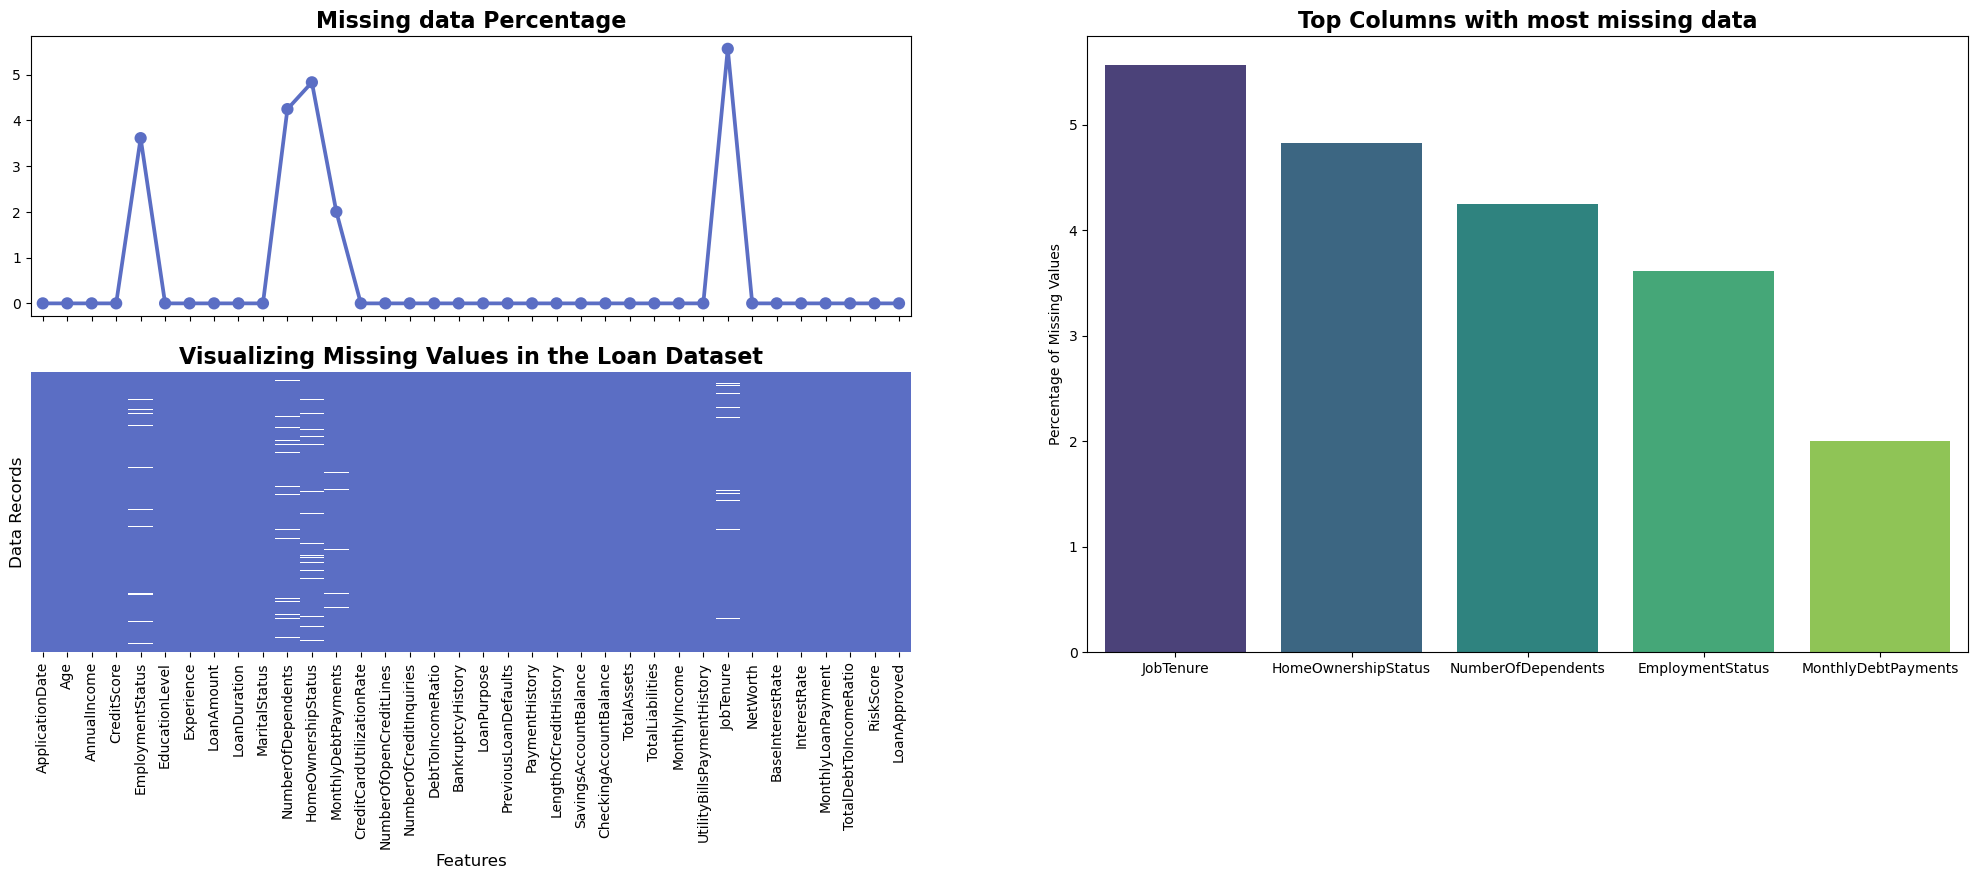

In [8]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(2, 2, figsize=(25, 8))
null_df = df.isnull().sum() /df.shape[0] * 100
missing = null_df[null_df > 0].sort_values(ascending=False)



# --- pointplot of % of Missing Values ---
plt.subplot(2, 2, 1)
ax = sns.pointplot(x=null_df.index, y=null_df.values, color="#5b6ec4")
plt.title("Missing data Percentage", fontsize=16, weight='bold')
ax.set_xticklabels([])

# --- hbar of % of Missing Values ---
plt.subplot(1, 2, 2)
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Top Columns with most missing data", fontsize=16, weight='bold')
plt.ylabel("Percentage of Missing Values")

# --- Heatmap of Missing Values ---
bw_cmap = ListedColormap(["#5b6ec4", "white"])
plt.subplot(2, 2, 3)
sns.heatmap(df.isnull(), cbar=False, cmap=bw_cmap, yticklabels=False)
plt.title('Visualizing Missing Values in the Loan Dataset', fontsize=16, weight='bold')
plt.ylabel('Data Records', fontsize=12)
plt.xlabel('Features', fontsize=12)



plt.show()


In [9]:
homeowner = df[['HomeOwnershipStatus', 'AnnualIncome', 'LoanApproved', 'MonthlyIncome']].copy()

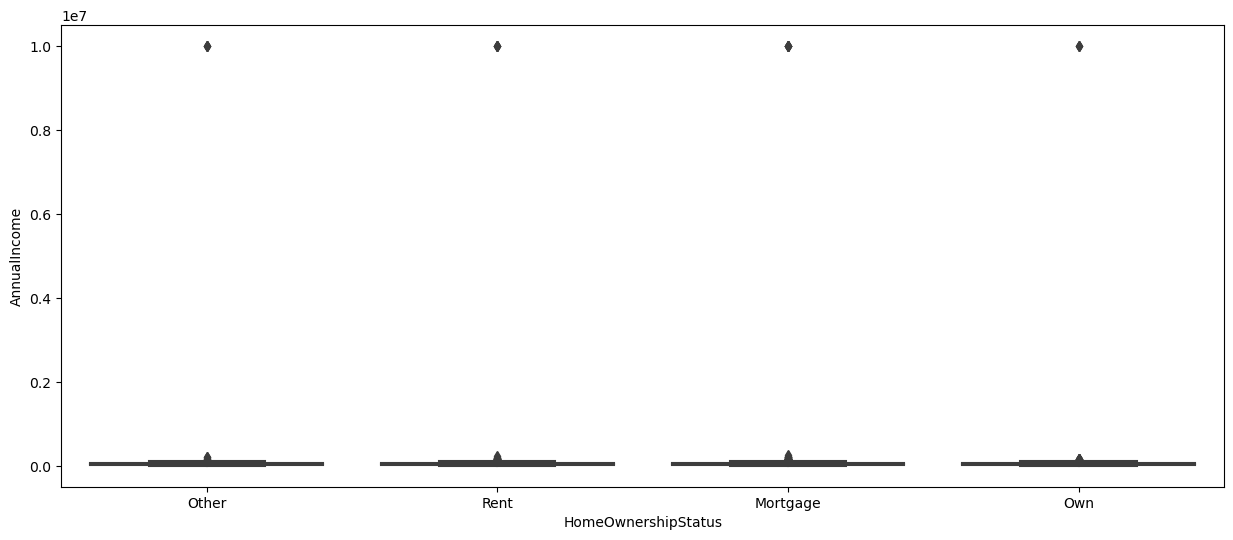

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(x='HomeOwnershipStatus', y='AnnualIncome', data=homeowner)
plt.show()

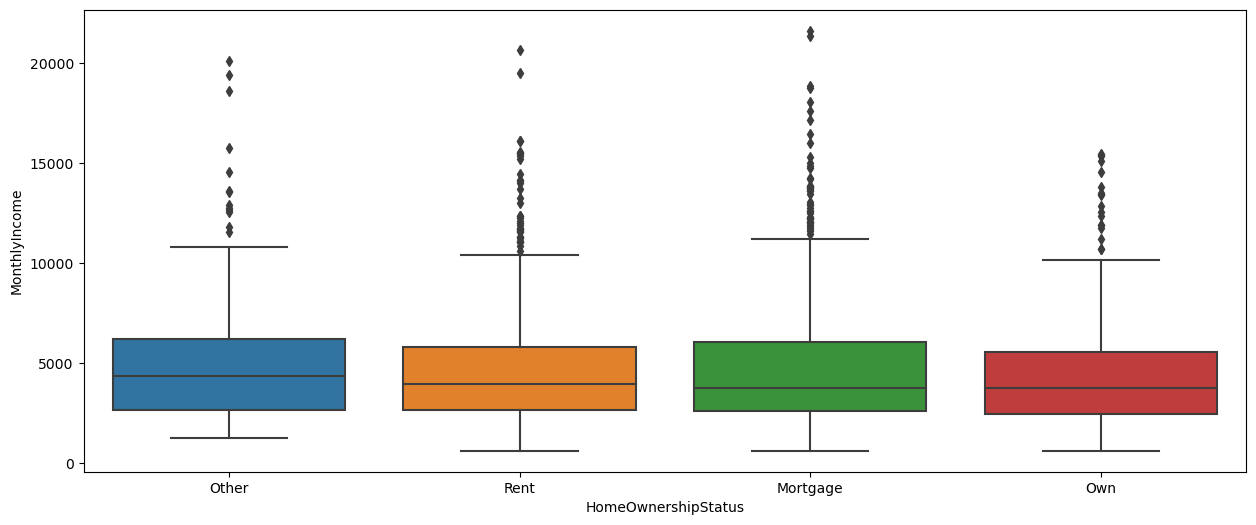

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(x='HomeOwnershipStatus', y='MonthlyIncome', data=homeowner)
plt.show()

In [12]:
df[df['AnnualIncome'] >= 1e7]

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
45,2072-07-31,25,10000000,590,Employed,Bachelor,0,32537,72,Divorced,...,9835.666667,0.534643,5.0,10650,0.252537,0.273780,924.522897,0.153474,50.0,0
61,2051-05-25,42,10000000,597,Employed,Associate,17,21882,84,Divorced,...,2911.916667,0.759398,5.0,112385,0.248382,0.248875,552.296081,0.350386,47.0,0
84,2051-12-16,37,10000000,614,Self-Employed,Master,14,66159,48,Single,...,5008.750000,0.736770,5.0,25132,0.254159,0.267376,2258.244385,0.525929,60.0,0
122,2046-02-25,52,10000000,575,Employed,Bachelor,28,9260,48,Married,...,4227.083333,0.888064,5.0,10751,0.216760,0.245379,304.653074,0.172063,40.0,1
263,2055-11-20,39,10000000,437,Employed,Associate,13,13106,72,Divorced,...,8238.000000,0.987532,5.0,3658,0.309606,0.252615,355.144493,0.071758,43.2,1
295,2045-06-27,63,10000000,650,Employed,Bachelor,40,34632,48,Widowed,...,6960.250000,0.549076,4.0,9201,0.204632,0.185740,1027.732131,0.218057,44.0,0
548,2044-06-21,28,10000000,595,Employed,Bachelor,6,31778,60,Married,...,4519.250000,0.775941,3.0,47534,0.239278,0.287134,1003.154832,0.441700,57.0,0
635,2062-09-28,56,10000000,593,Employed,Bachelor,34,13814,12,Married,...,20083.833333,0.896038,6.0,45835,0.182314,0.180172,1266.580332,0.074616,41.6,1
672,2034-08-13,50,10000000,481,Employed,Bachelor,25,20303,48,Married,...,3537.083333,0.870611,6.0,73144,0.274803,0.245733,668.365772,0.306288,48.0,0
781,2023-12-06,27,10000000,545,Employed,Bachelor,3,8380,96,Divorced,...,6438.666667,0.731124,4.0,166054,0.270880,0.313641,239.112274,0.071305,50.0,0


These guys have 10M $ annualIncome becoming outlier in every homeownership category.

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/arash/App/anaconda/envs/QBX/lib/python3.9/sit

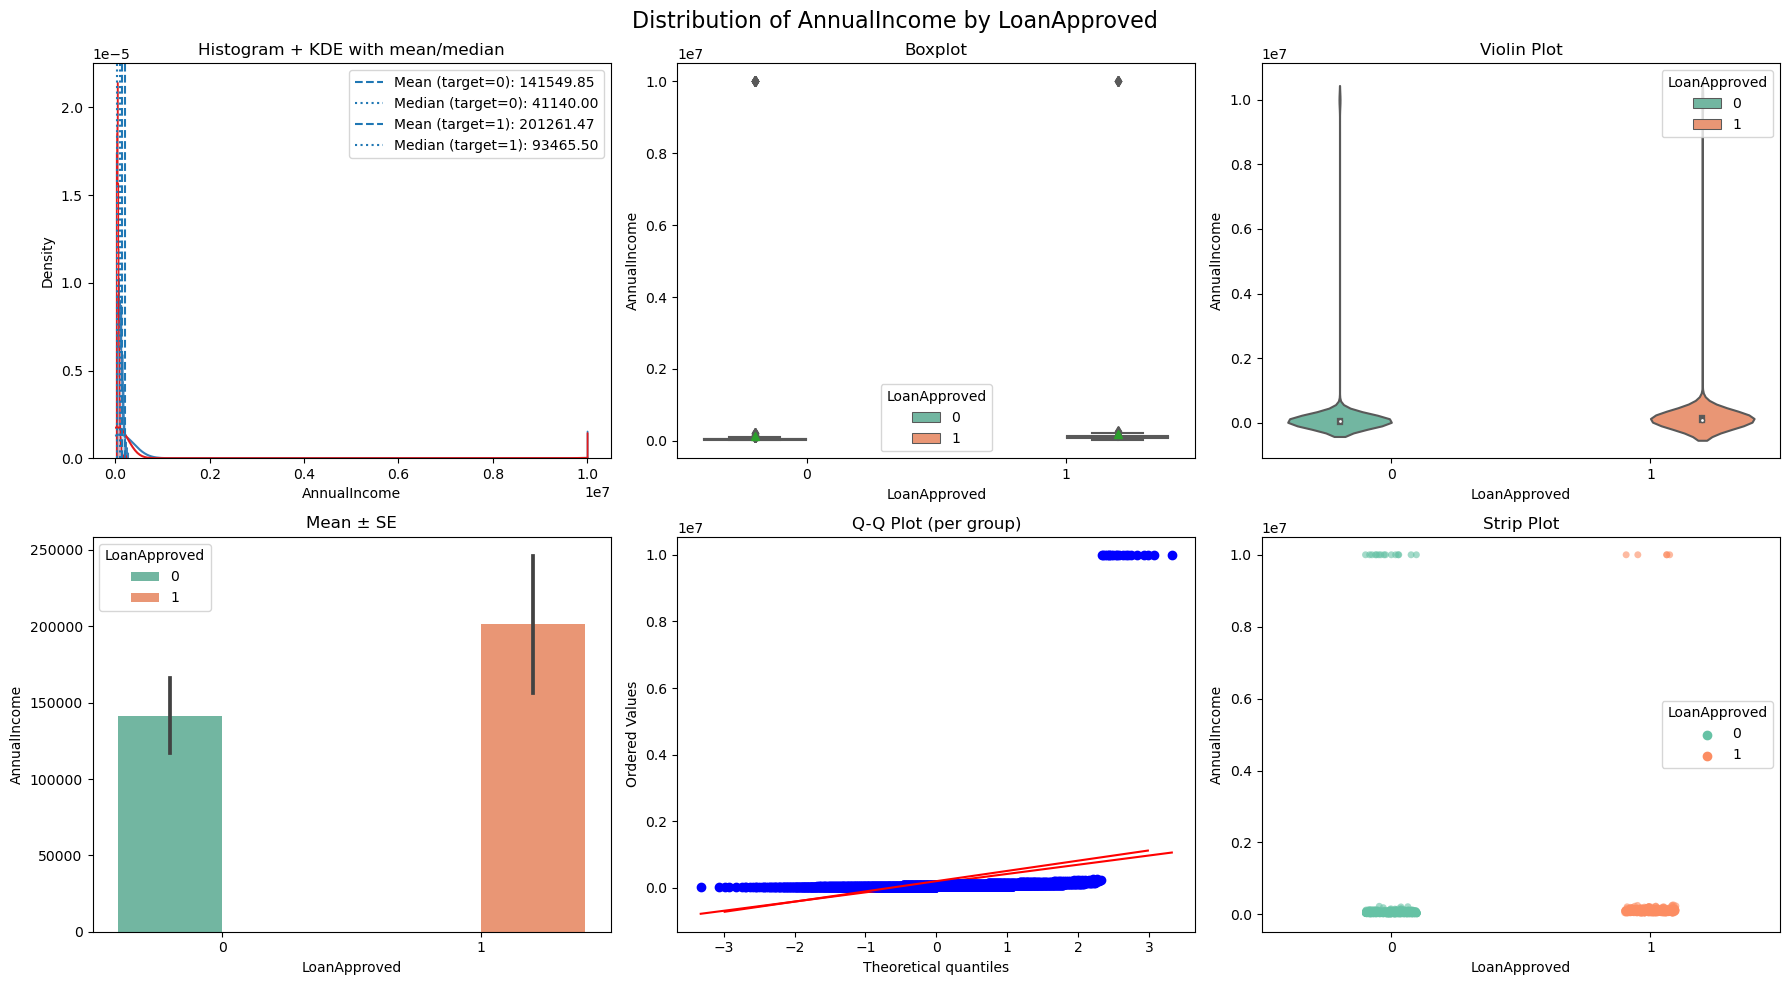

In [14]:
plot_feature_vs_target(homeowner, feature_col="AnnualIncome", target_col="LoanApproved")

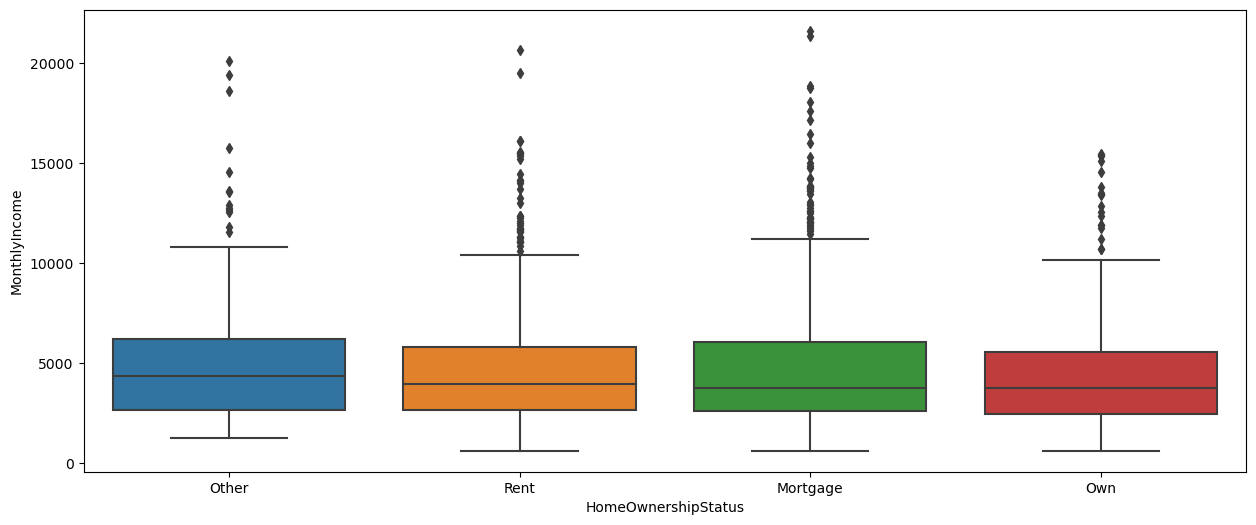

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(x='HomeOwnershipStatus', y='MonthlyIncome', data=homeowner)
plt.show()

In [16]:
df['YearlyIncome'] = df['MonthlyIncome'] * 12

In [17]:
df[['AnnualIncome', 'YearlyIncome']].head(20)

,AnnualIncome,YearlyIncome
0,63052,63052.0
1,62117,62117.0
2,32448,32448.0
3,32182,32182.0
4,77191,77191.0
5,65873,65873.0
6,53062,53062.0
7,99221,99221.0
8,15000,15000.0
9,46213,46213.0


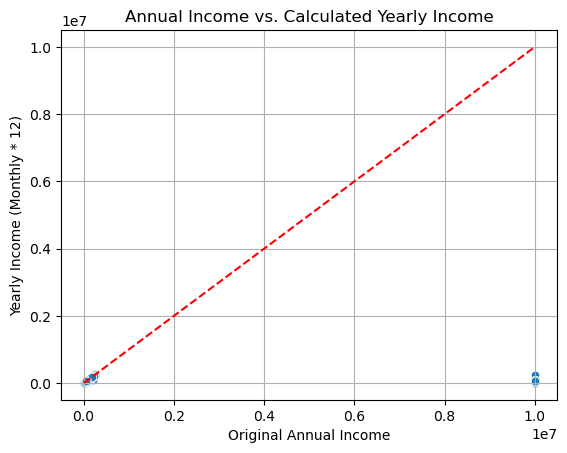

In [18]:
sns.scatterplot(data=df, x='AnnualIncome', y='YearlyIncome')

min_val = min(df['AnnualIncome'].min(), df['YearlyIncome'].min())
max_val = max(df['AnnualIncome'].max(), df['YearlyIncome'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title('Annual Income vs. Calculated Yearly Income')
plt.xlabel('Original Annual Income')
plt.ylabel('Yearly Income (Monthly * 12)')
plt.grid(True)
plt.show()


In [19]:
df['IncomeDifference'] = df['AnnualIncome'] - df['YearlyIncome']

In [20]:
print("Statistics for the income difference:")
print(df['IncomeDifference'].describe())

Statistics for the income difference:
count    2.050000e+03
mean     9.870850e+04
std      9.760575e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.985000e+06
Name: IncomeDifference, dtype: float64


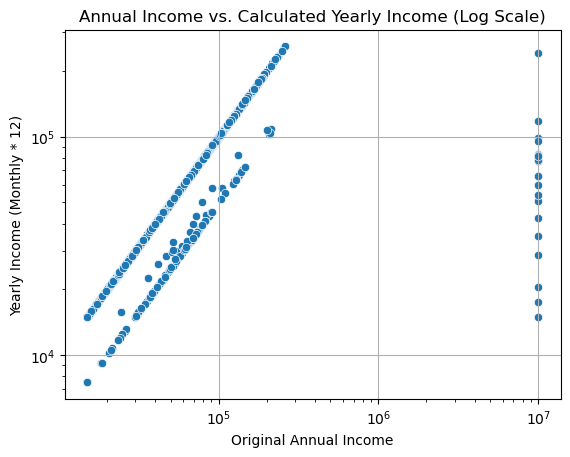

In [21]:
sns.scatterplot(data=df, x='AnnualIncome', y='YearlyIncome')

plt.xscale('log')
plt.yscale('log')

plt.title('Annual Income vs. Calculated Yearly Income (Log Scale)')
plt.xlabel('Original Annual Income')
plt.ylabel('Yearly Income (Monthly * 12)')
plt.grid(True)
plt.show()

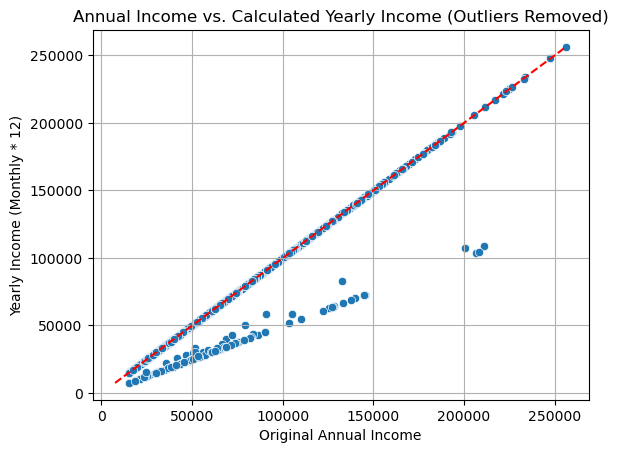

In [22]:
quantile_99 = df['AnnualIncome'].quantile(0.99)

df_filtered = df[df['AnnualIncome'] < quantile_99]

sns.scatterplot(data=df_filtered, x='AnnualIncome', y='YearlyIncome')

min_val = min(df_filtered['AnnualIncome'].min(), df_filtered['YearlyIncome'].min())
max_val = max(df_filtered['AnnualIncome'].max(), df_filtered['YearlyIncome'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title('Annual Income vs. Calculated Yearly Income (Outliers Removed)')
plt.xlabel('Original Annual Income')
plt.ylabel('Yearly Income (Monthly * 12)')
plt.grid(True)
plt.show()

Can't exactly say annualincome = monthlyincome *12


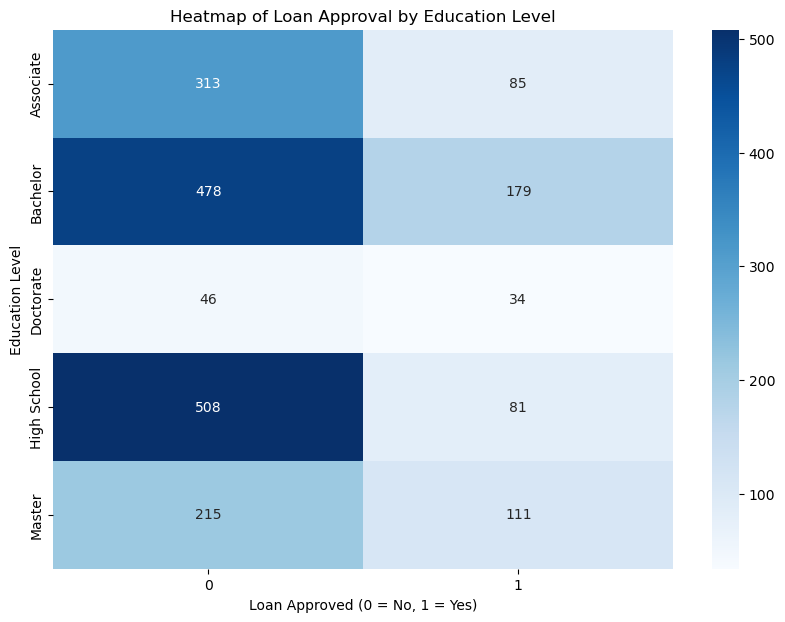

In [23]:
contingency_table = pd.crosstab(df['EducationLevel'], df['LoanApproved'])

plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, 
            annot=True,     # numbers in cells
            fmt='d',        # numbers as integers
            cmap='Blues')   

plt.title('Heatmap of Loan Approval by Education Level')
plt.ylabel('Education Level')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.show()

In [24]:

def plot_categorical_vs_target(df, categorical_col, target_col):
    fig, axes = plt.subplots(2, 3, figsize=(22, 14))
    fig.suptitle(f'Heatmap Analysis of {target_col} by {categorical_col}', fontsize=16)


    # --- Heatmap 1: Frequency of each Education Level ---
    freq_data = df[categorical_col].value_counts(sort=False).to_frame(name='Count')
    sns.heatmap(ax=axes[0, 0], data=freq_data, annot=True, fmt='d', cmap='cividis', cbar=False)
    axes[0, 0].set_title('Frequency of Applicants')
    axes[0, 0].set_xlabel('')
    axes[0, 0].set_ylabel(categorical_col)


    # --- Heatmap 2: Count of Approvals vs. Denials ---
    count_table = pd.crosstab(df[categorical_col], df[target_col])
    sns.heatmap(ax=axes[0, 1], data=count_table, annot=True, fmt='d', cmap='cividis')
    axes[0, 1].set_title('Approval Counts')
    axes[0, 1].set_xlabel('Loan Approved (0 = No, 1 = Yes)')
    axes[0, 1].set_ylabel('')


    # --- Heatmap 3: Percentage of Approvals vs. Denials ---
    percentage_table = pd.crosstab(df[categorical_col], df[target_col], normalize='index')
    sns.heatmap(ax=axes[0, 2], data=percentage_table, annot=True, fmt='.1%', cmap='cividis')
    axes[0, 2].set_title('Approval Percentages')
    axes[0, 2].set_xlabel('Loan Approved (0 = No, 1 = Yes)')
    axes[0, 2].set_ylabel('')


    # --- Plot 4: Frequency of each category} ---
    sns.countplot(ax=axes[1, 0], data=df, x=categorical_col, palette='cividis')
    axes[1, 0].set_title('Frequency of Applicants')
    axes[1, 0].set_xlabel(categorical_col)
    axes[1, 0].set_ylabel('Total Count')
    plt.setp(axes[1, 0].get_xticklabels(), rotation=90, ha='right')


    # --- Plot 5: Count of target vs. category (Grouped Bar Chart) ---
    count_table = pd.crosstab(df[categorical_col], df[target_col])
    count_table.plot(kind='bar', ax=axes[1, 1], colormap='cividis')
    axes[1, 1].set_title('Approval Counts')
    axes[1, 1].set_xlabel(categorical_col)
    axes[1, 1].set_ylabel('Number of Applicants')
    axes[1, 1].legend(title='Loan Approved', labels=['Denied (0)', 'Approved (1)'])


    # --- Plot 6: Percentage of target vs. category (100% Stacked Bar) ---
    percentage_table = pd.crosstab(df[categorical_col], df[target_col], normalize='index')
    percentage_table.plot(kind='bar', stacked=True, ax=axes[1, 2], colormap='cividis')
    axes[1, 2].set_title('Approval Percentages')
    axes[1, 2].set_xlabel(categorical_col)
    axes[1, 2].set_ylabel('Percentage')
    axes[1, 2].legend(title='Loan Approved', labels=['Denied (0)', 'Approved (1)'])

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [25]:
def plot_numerical_vs_target(df, numerical_col, target_col, bins=5, how='qcut'):
    tmp = df[[numerical_col, target_col]].copy()
    col_name = f'{numerical_col}_grouped'
    if how == 'qcut':
        tmp[col_name] = pd.qcut(tmp[numerical_col], q=bins, duplicates='drop')
    else:
        tmp[col_name] = pd.cut(tmp[numerical_col], bins=bins)
    plot_categorical_vs_target(tmp, categorical_col=col_name, target_col=target_col)
    

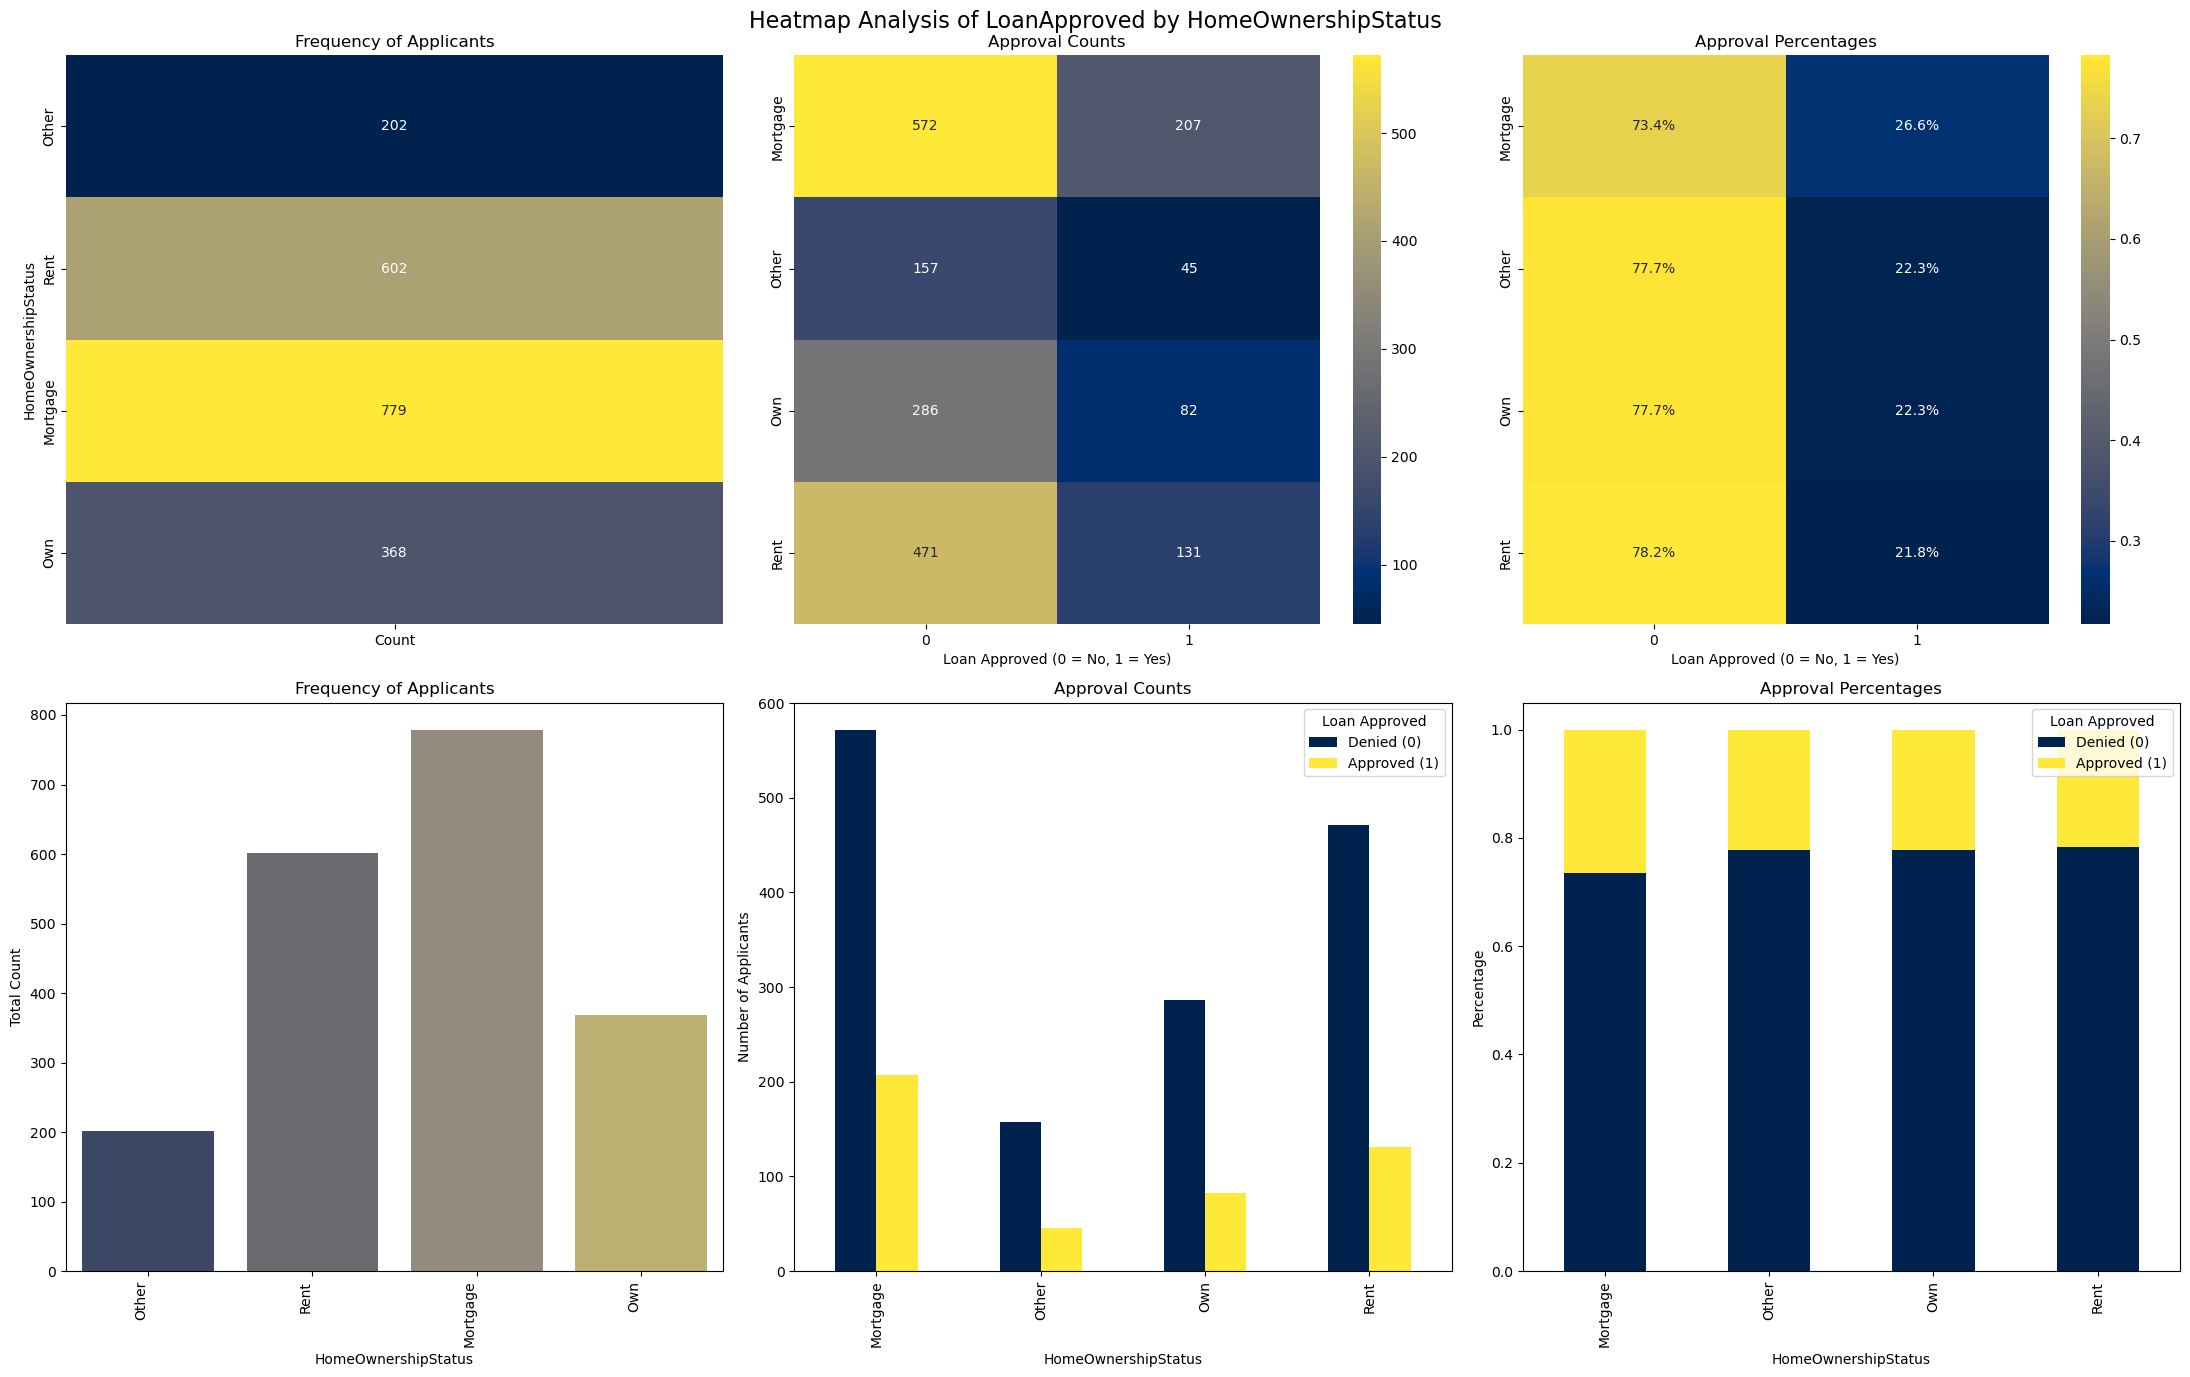

In [26]:
plot_categorical_vs_target(df, categorical_col='HomeOwnershipStatus', target_col='LoanApproved')

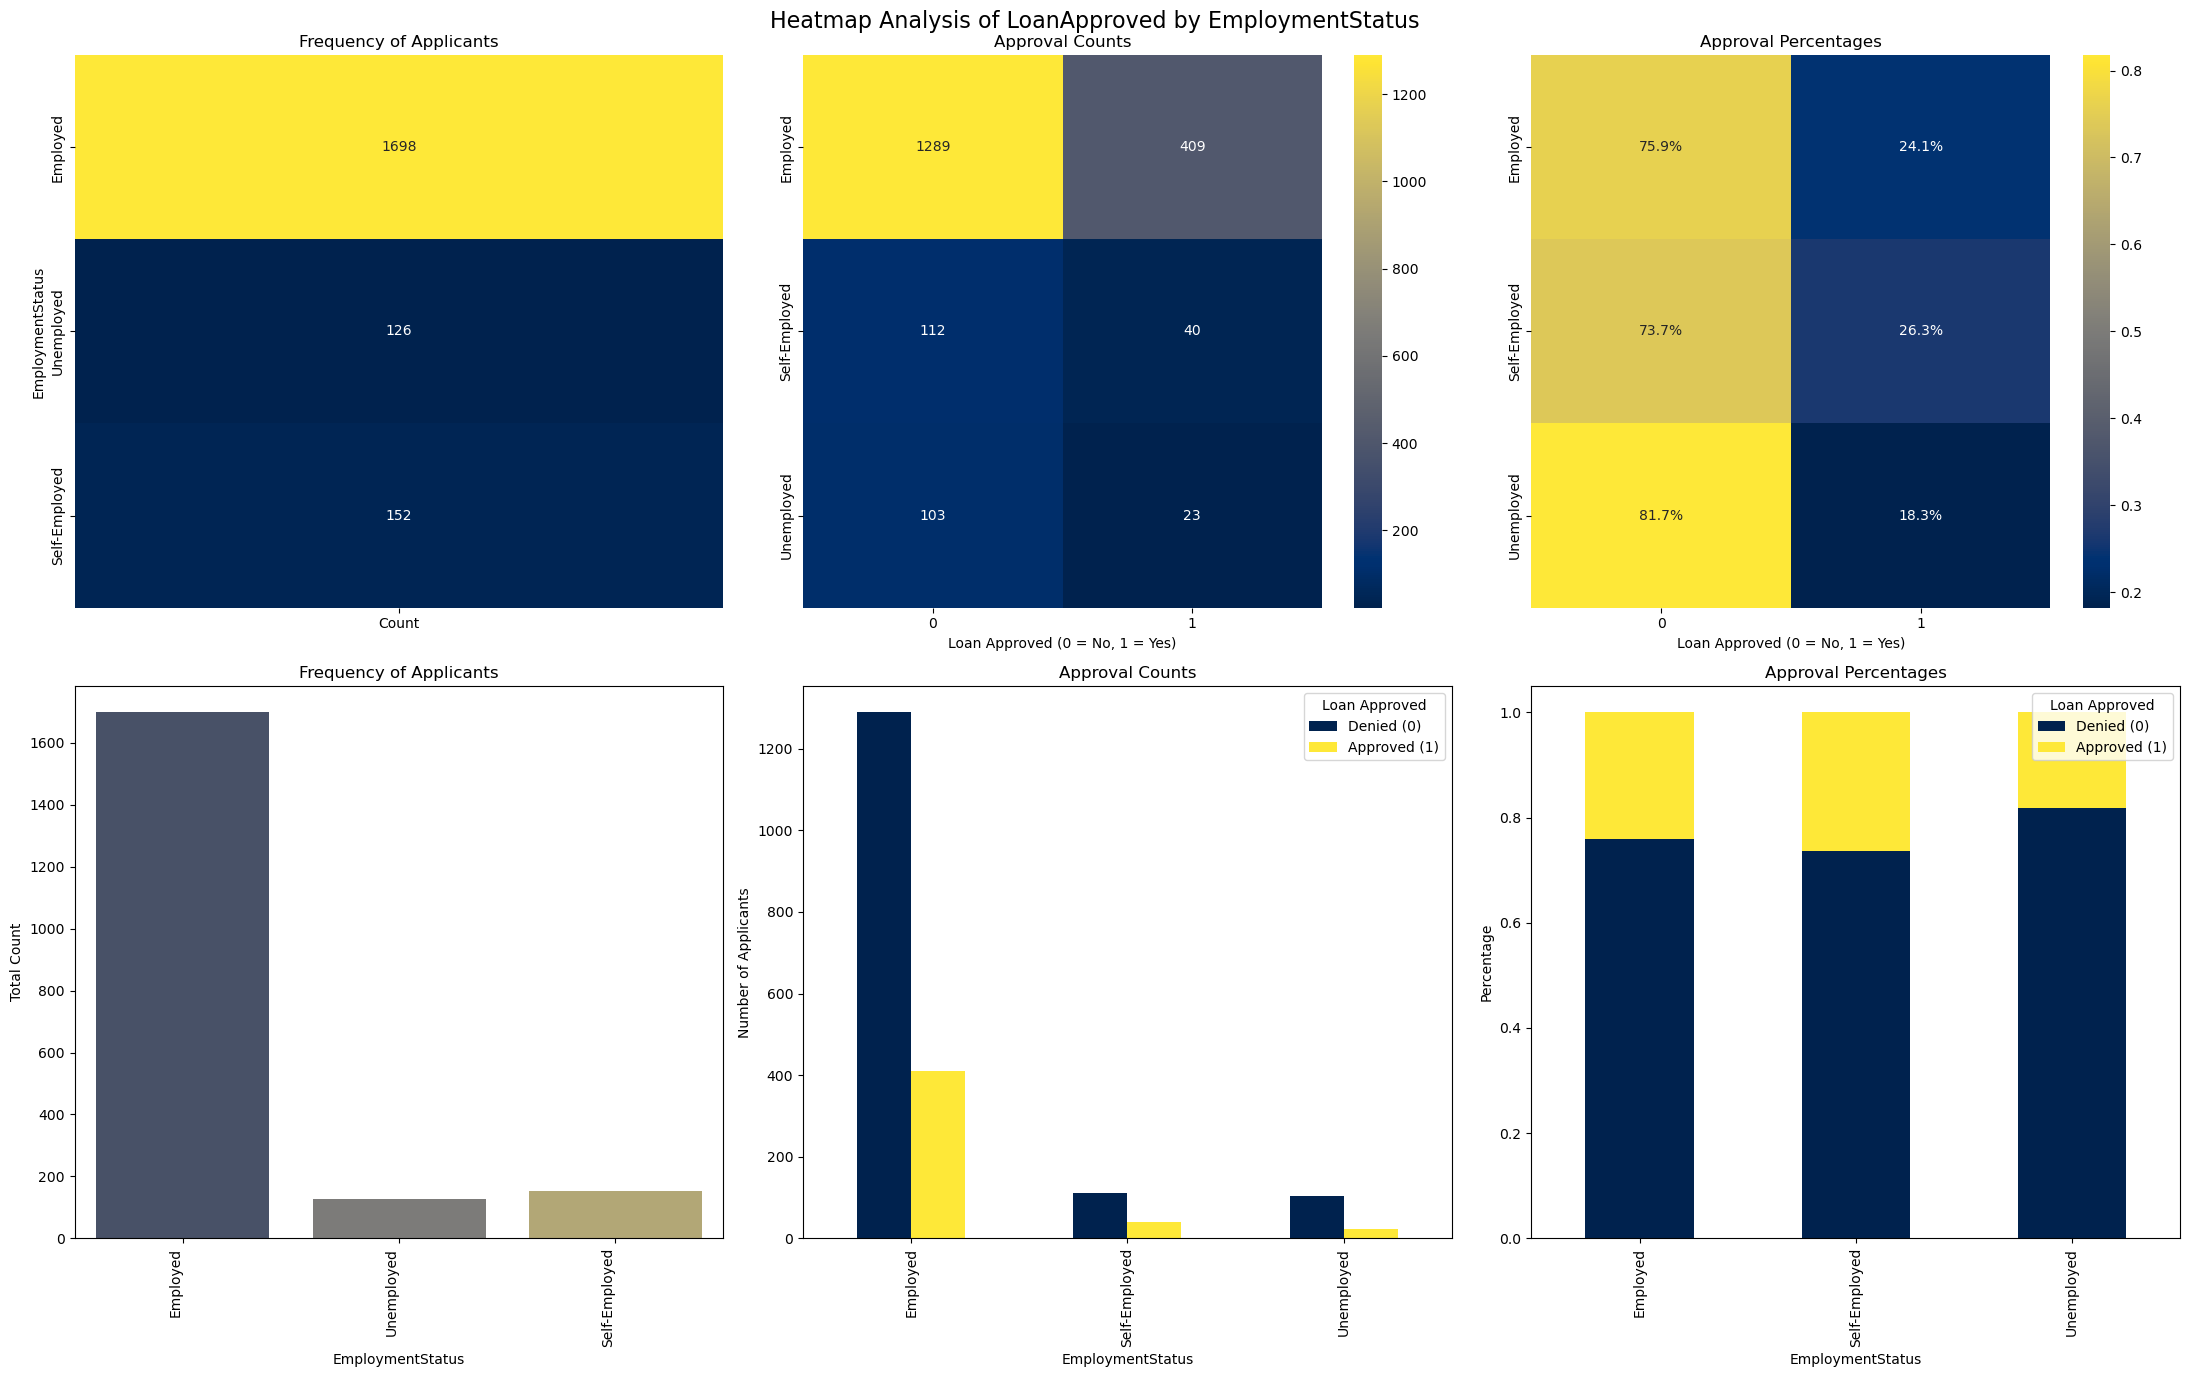

In [27]:
plot_categorical_vs_target(df, categorical_col='EmploymentStatus', target_col='LoanApproved')

WTF all of them are nearly the same 

In [28]:
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    elif month in [10, 11, 12]:
        return 'Q4'
    else:
        return np.nan

def get_day_of_week(date):
    return date.strftime('%A')

In [29]:

df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], format='%Y-%m-%d')
df['ApplicationYear'] = df['ApplicationDate'].dt.year
df['ApplicationQuarter'] = df['ApplicationDate'].dt.month.apply(get_quarter)
df['ApplicationDateOfWeek'] = df['ApplicationDate'].apply(get_day_of_week)
df['ApplicationFirstHalfOfMonth'] = df['ApplicationDate'].dt.day.apply(lambda x: 'First Half' if x <= 15 else 'Second Half')
df['ApplicationDateFirstHalfofYear'] = df['ApplicationDate'].dt.dayofyear.apply(lambda x: 'First Half' if x <= 182 else 'Second Half')

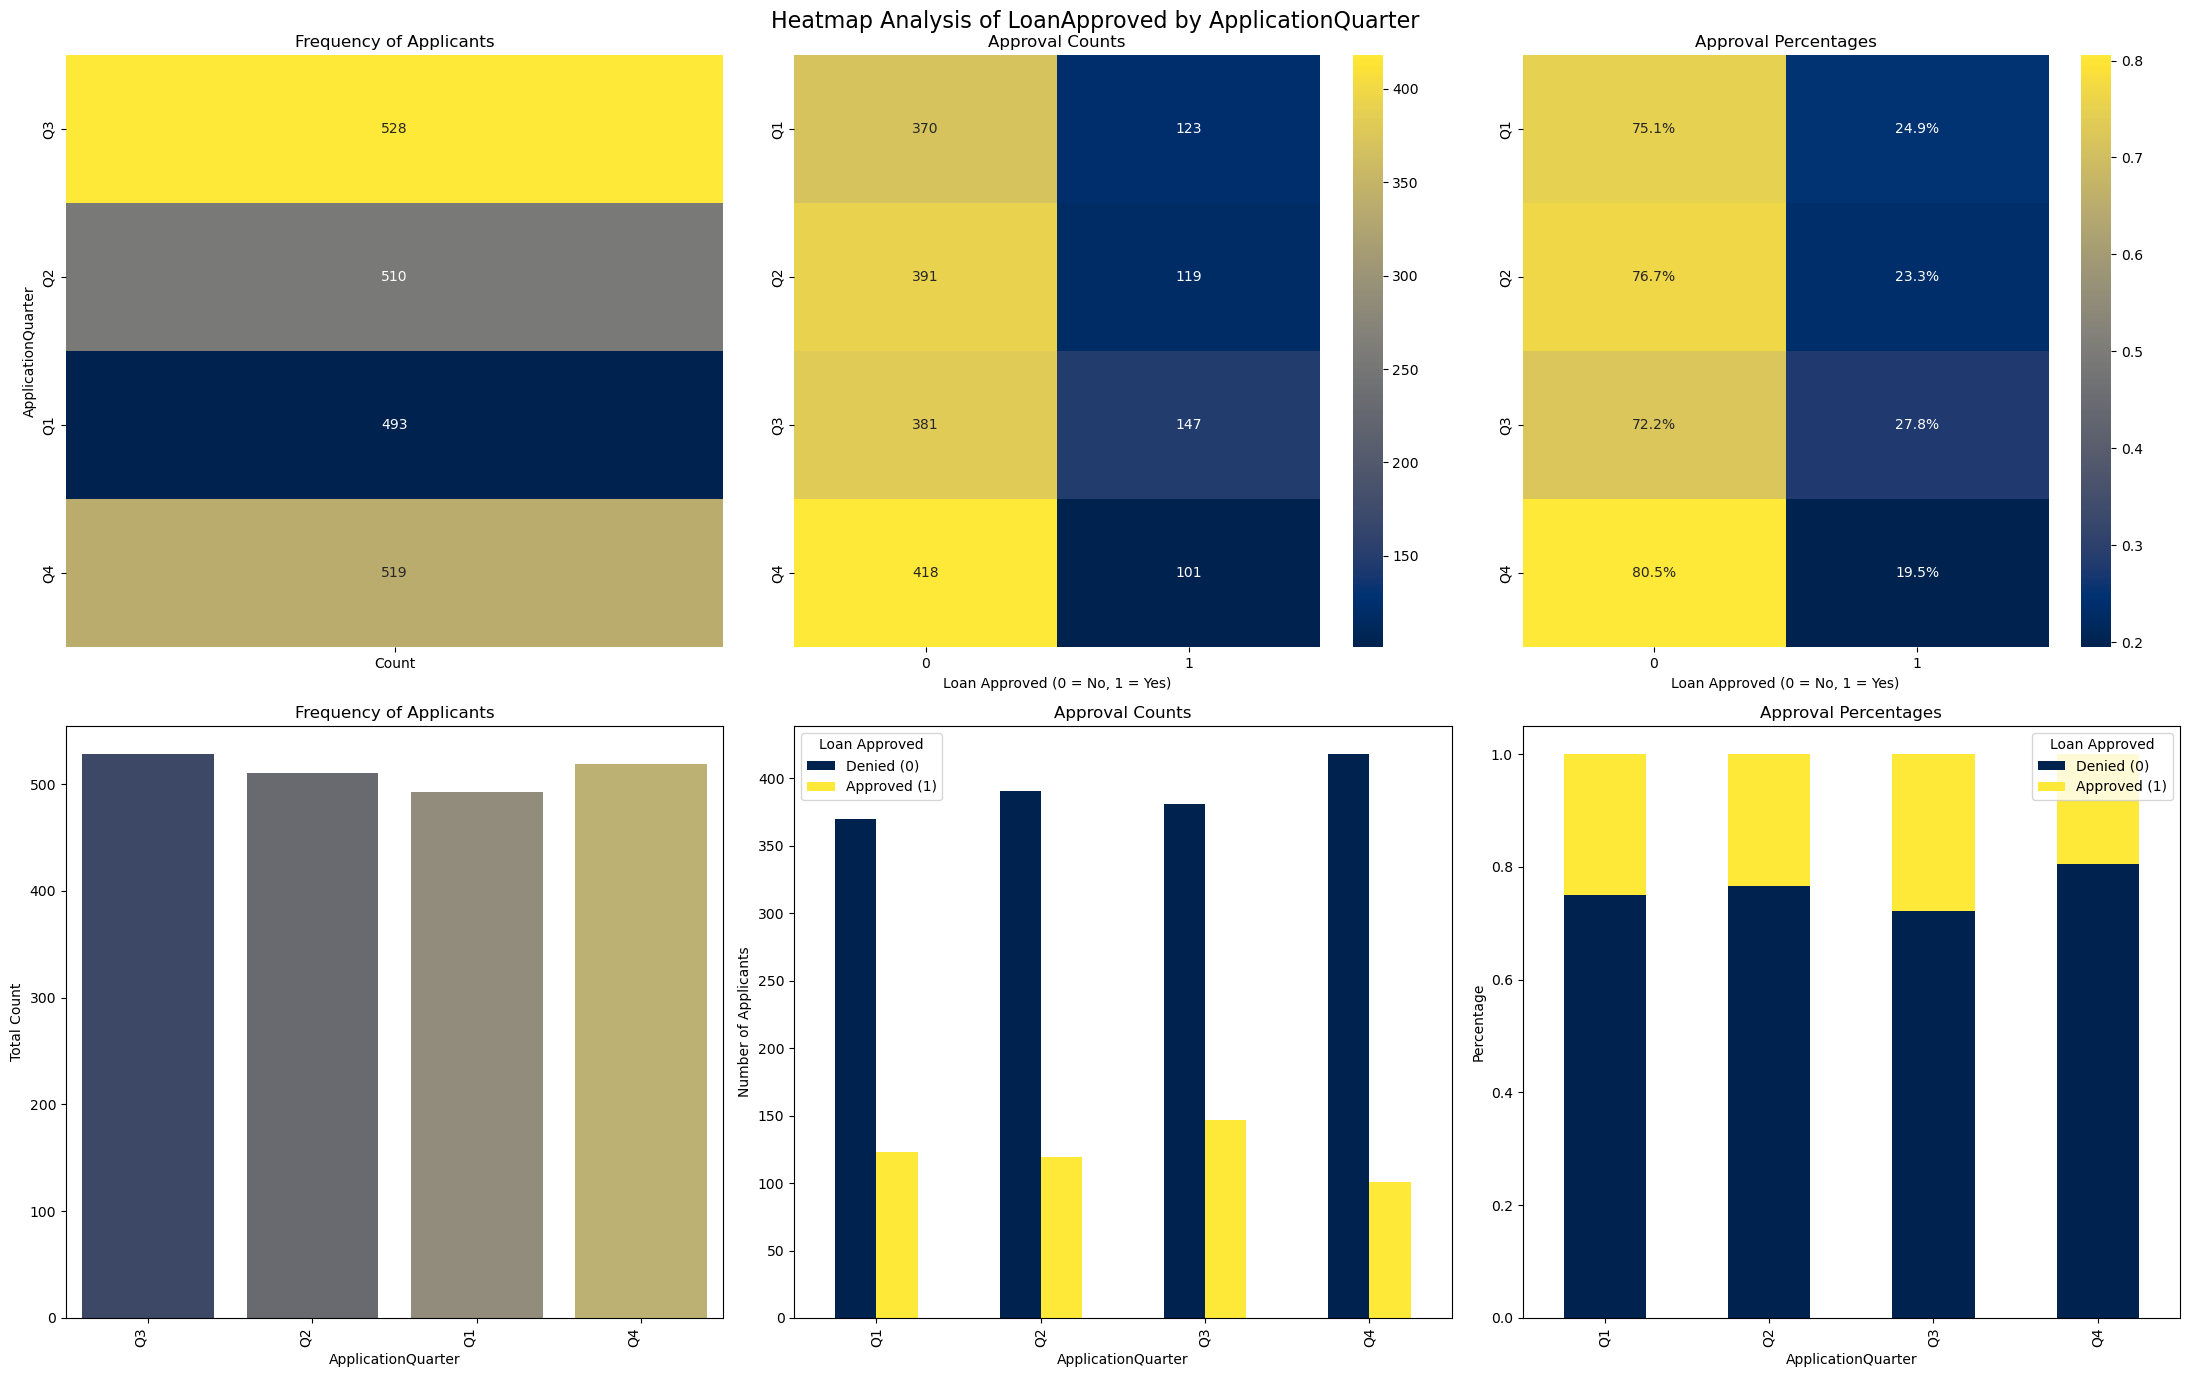

In [30]:
plot_categorical_vs_target(df, categorical_col='ApplicationQuarter', target_col='LoanApproved')

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/arash/App/anaconda/envs/QBX/lib/python3.9/sit

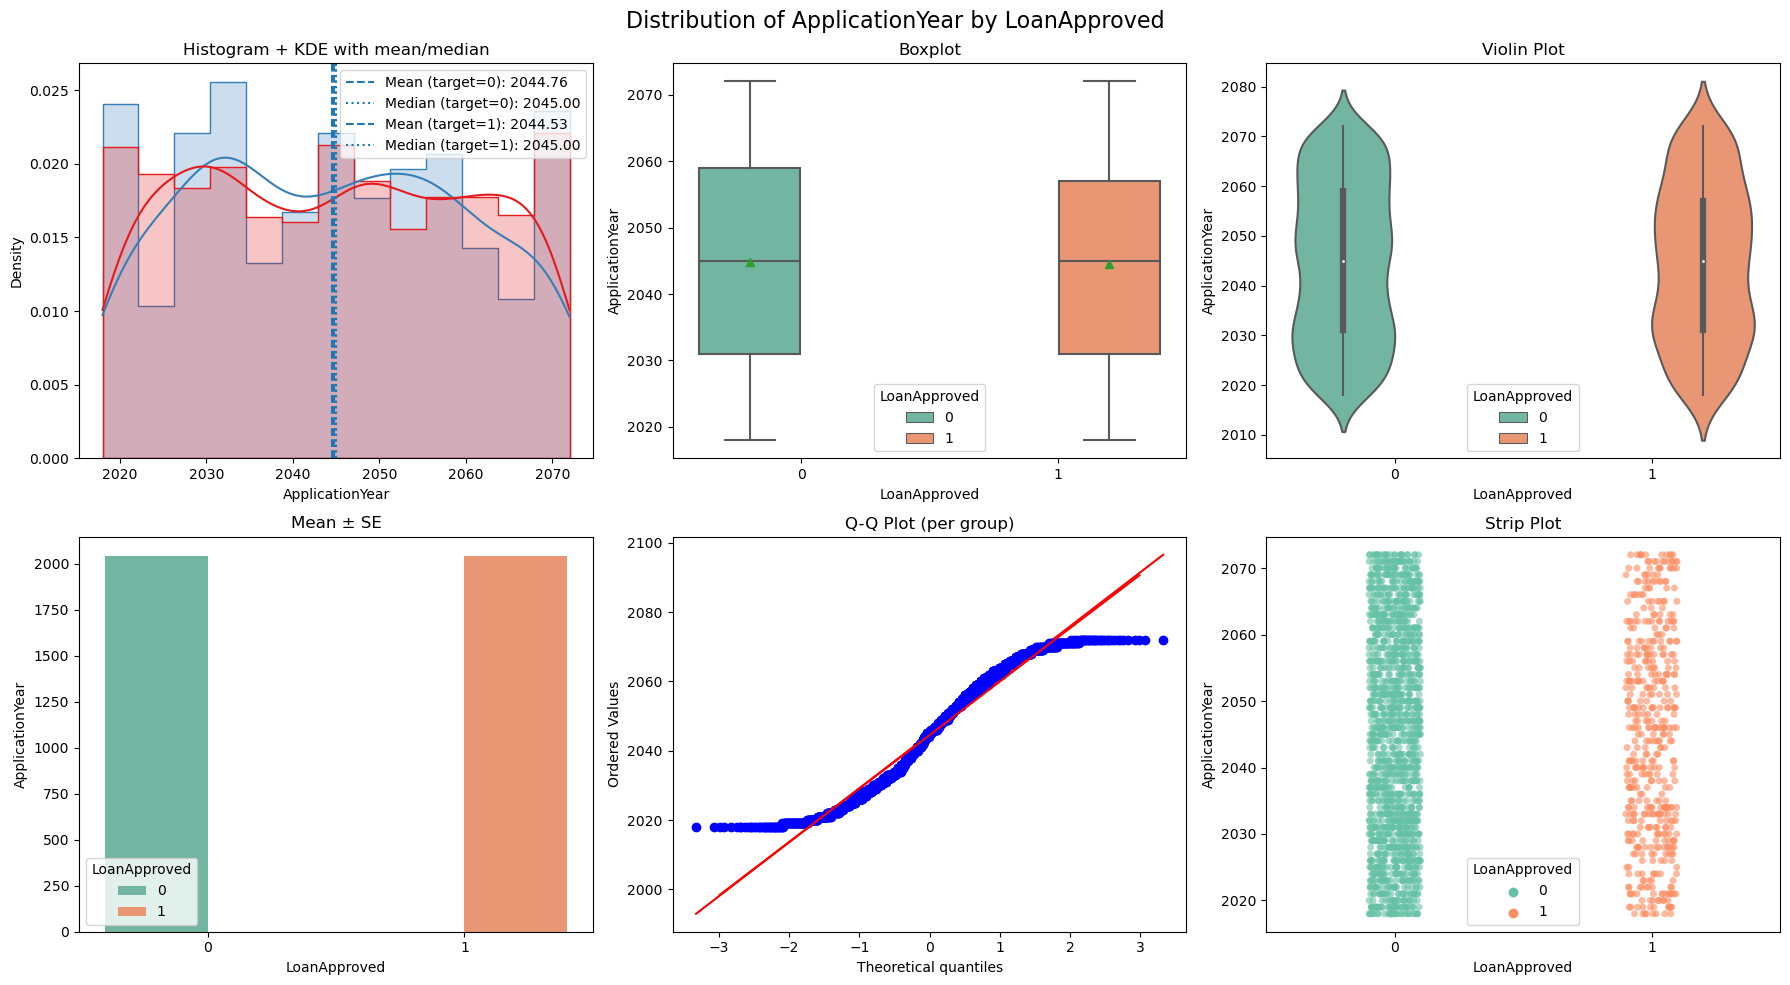

In [31]:
plot_feature_vs_target(df, feature_col="ApplicationYear", target_col="LoanApproved")

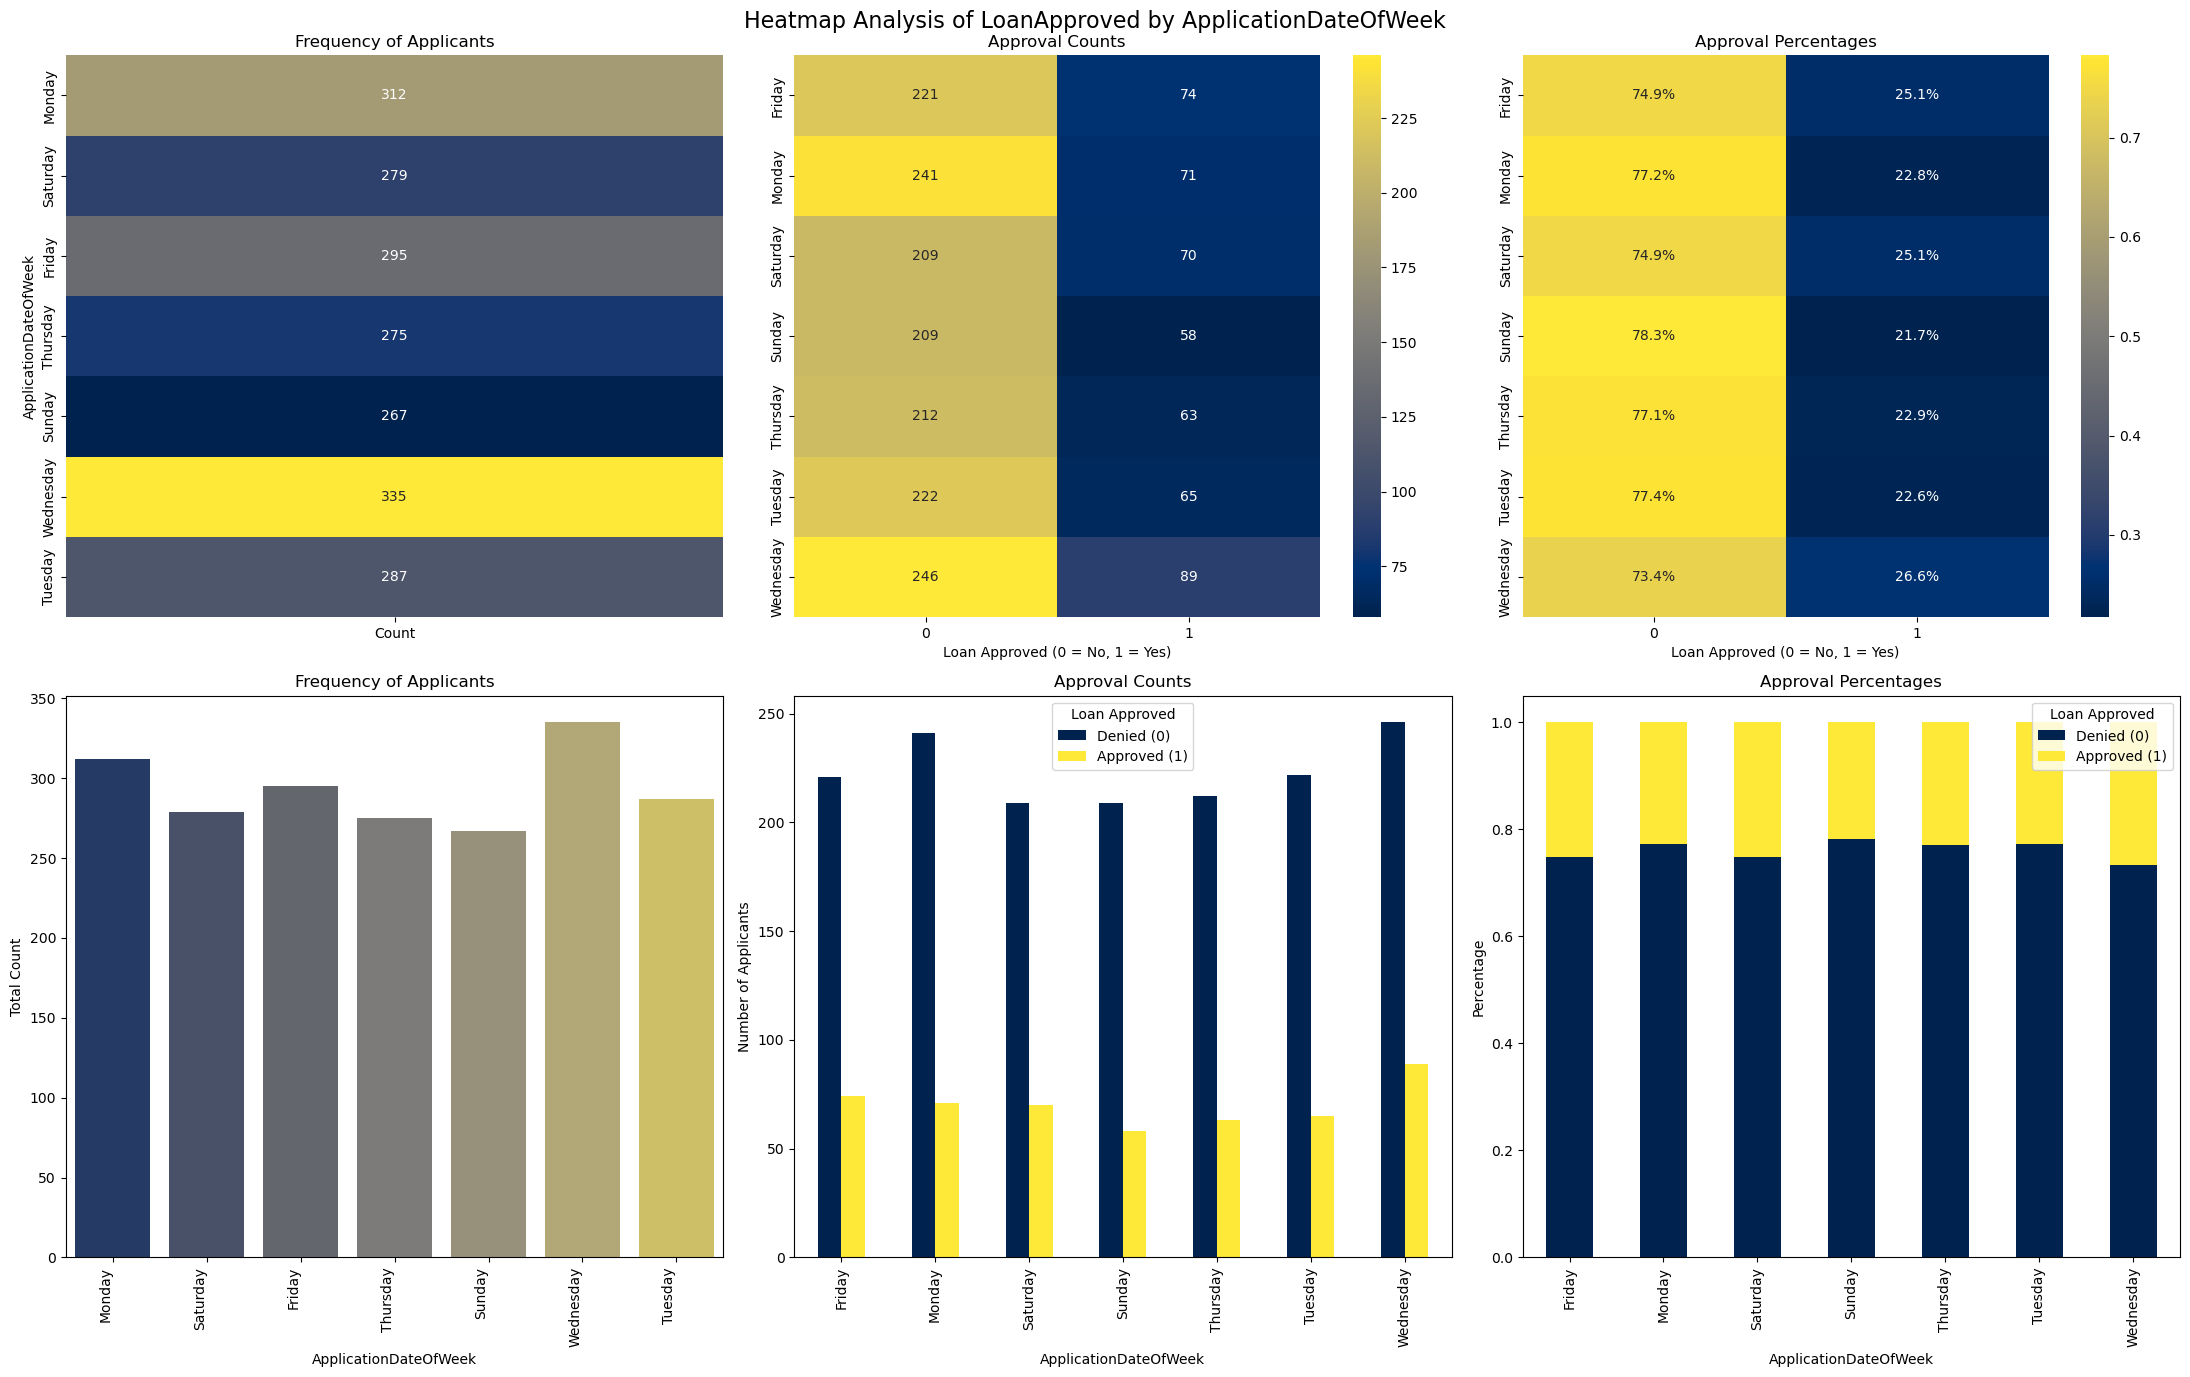

In [32]:
plot_categorical_vs_target(df, categorical_col='ApplicationDateOfWeek', target_col='LoanApproved')

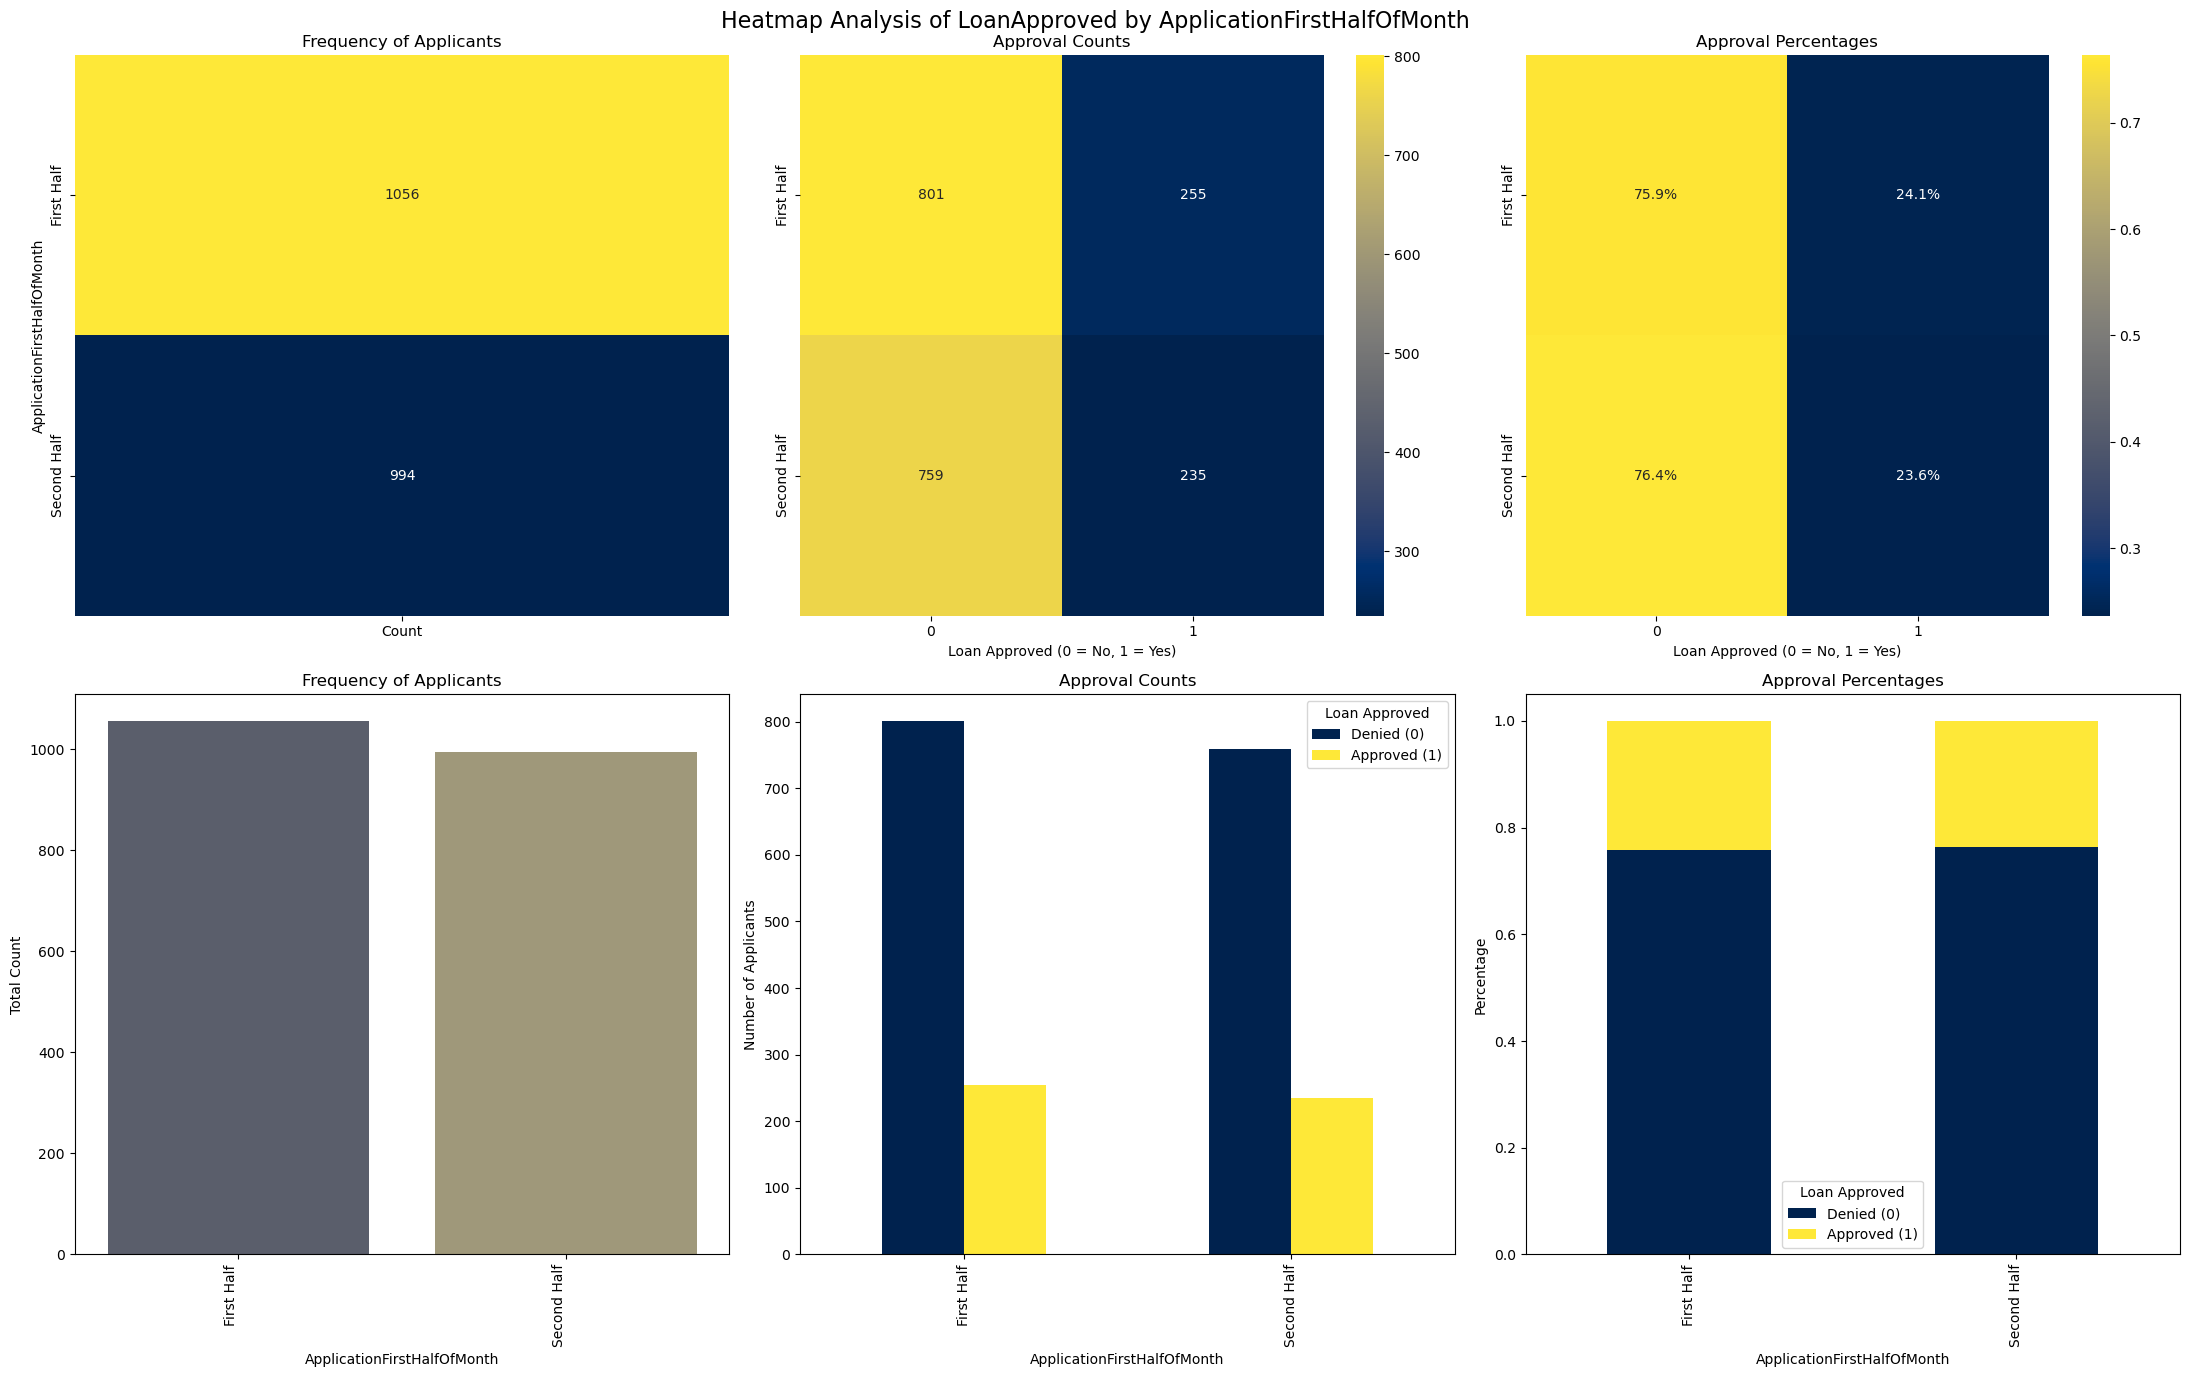

In [33]:

plot_categorical_vs_target(df, categorical_col='ApplicationFirstHalfOfMonth', target_col='LoanApproved')

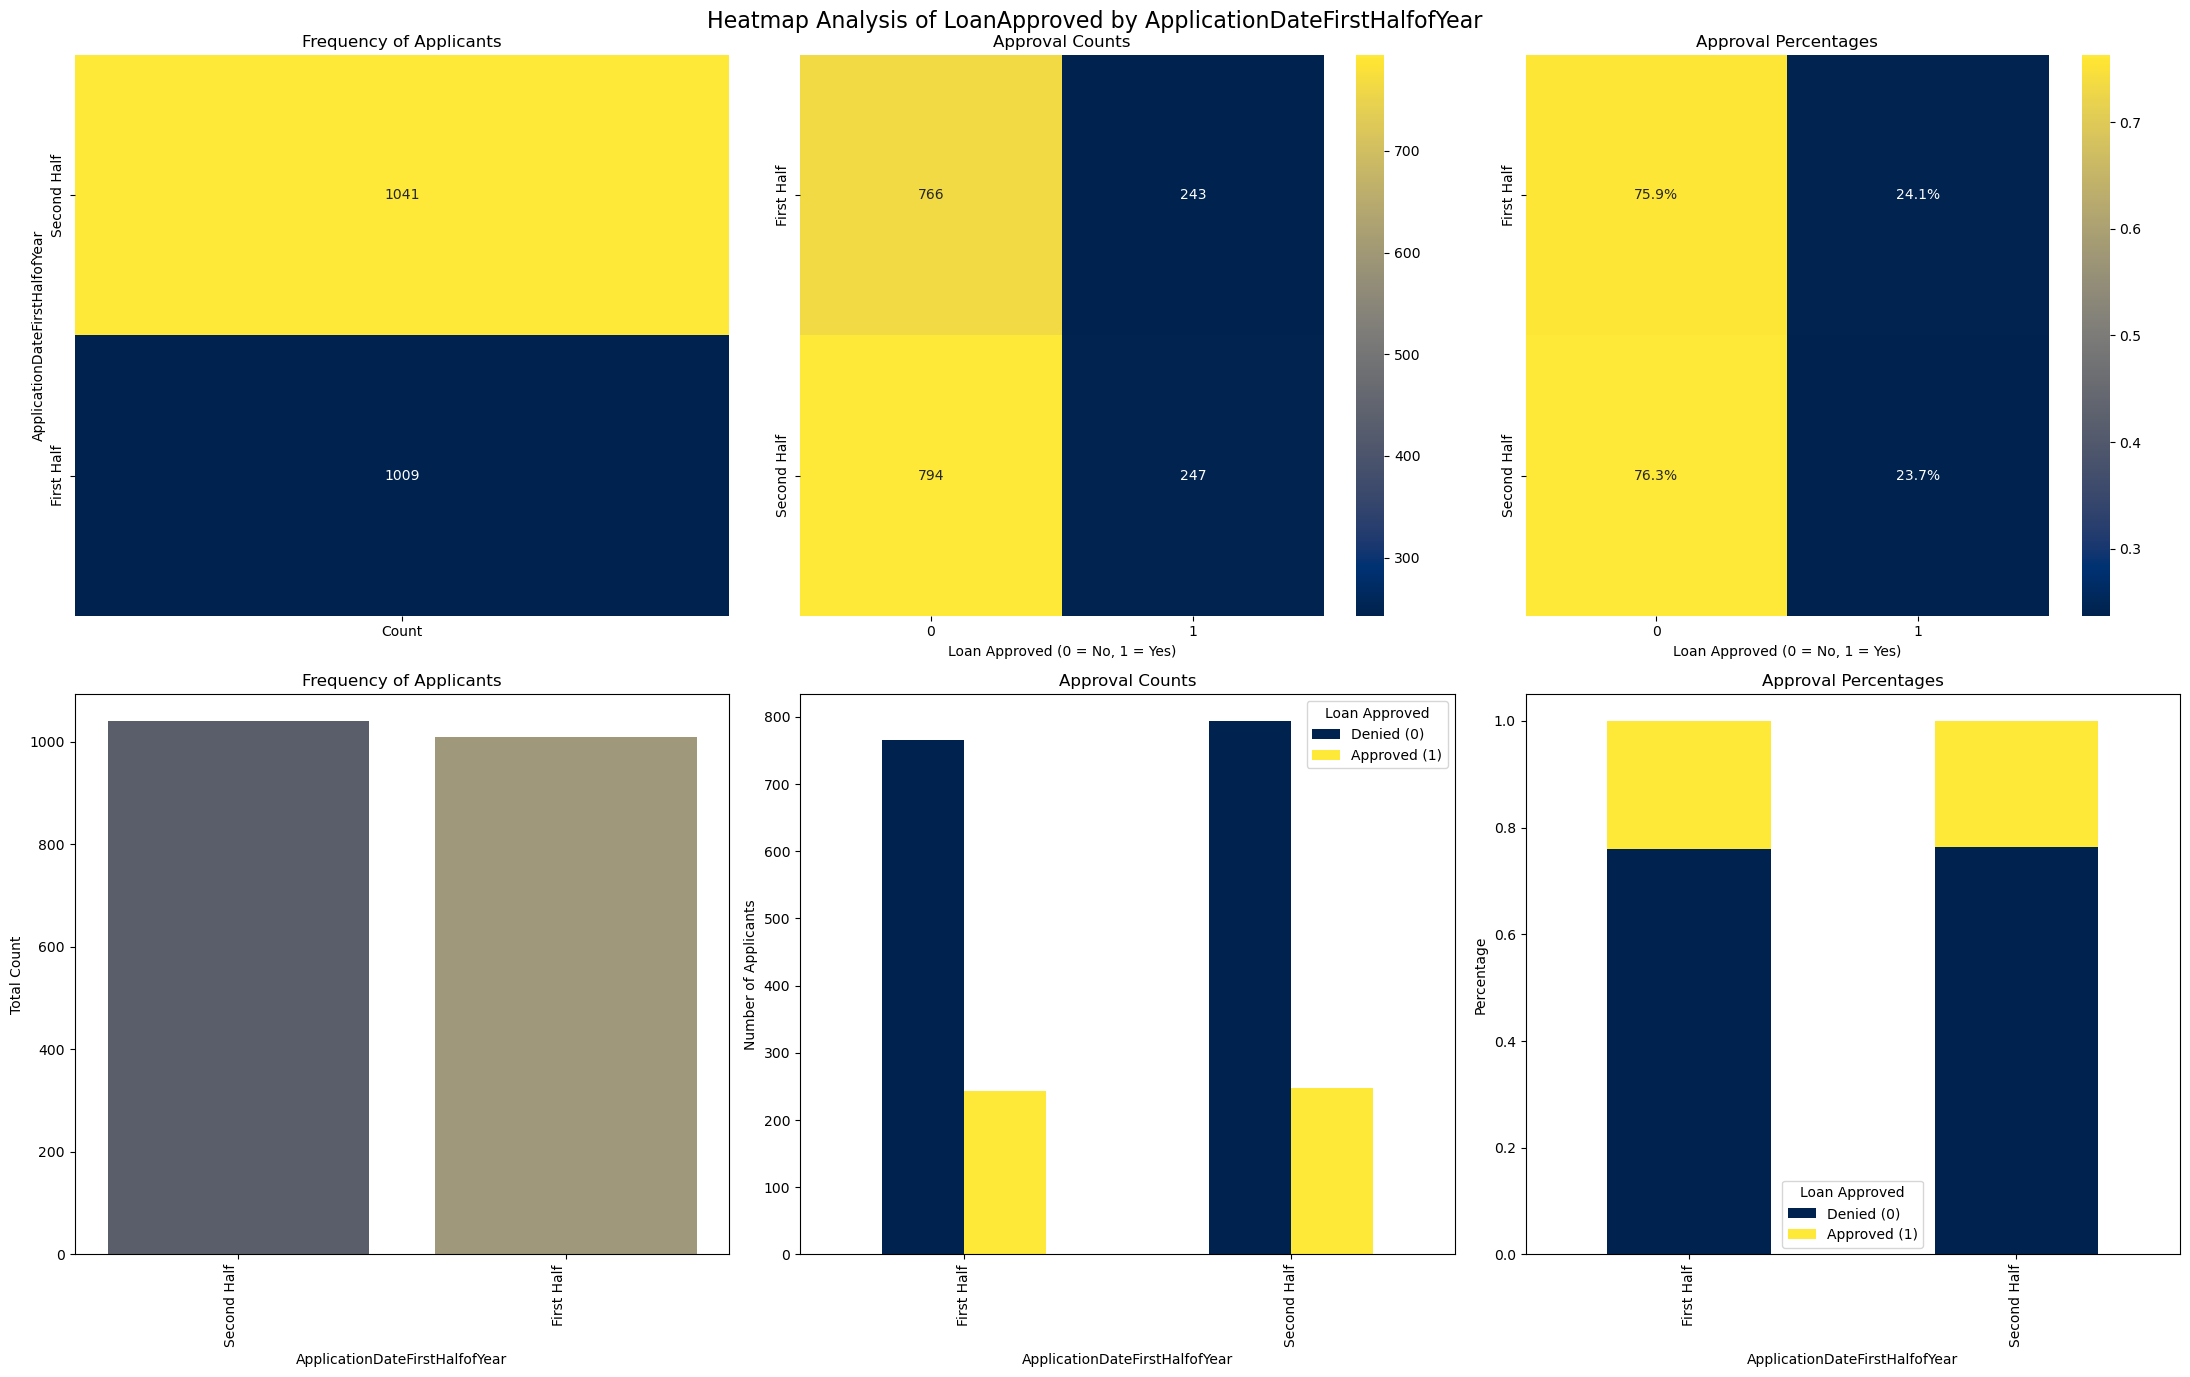

In [34]:
plot_categorical_vs_target(df, categorical_col='ApplicationDateFirstHalfofYear', target_col='LoanApproved')

All-in-all doesn't matter when you take fill an application

In [35]:
# grouping age 
age_bins = [17, 25, 34, 54, 64, 80]

age_labels = ['18-25', '26-34', '35-54', '55-64', '65 and Up']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

print(df['AgeGroup'].value_counts())

AgeGroup
35-54        1123
26-34         450
18-25         245
55-64         193
65 and Up      39
Name: count, dtype: int64


/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


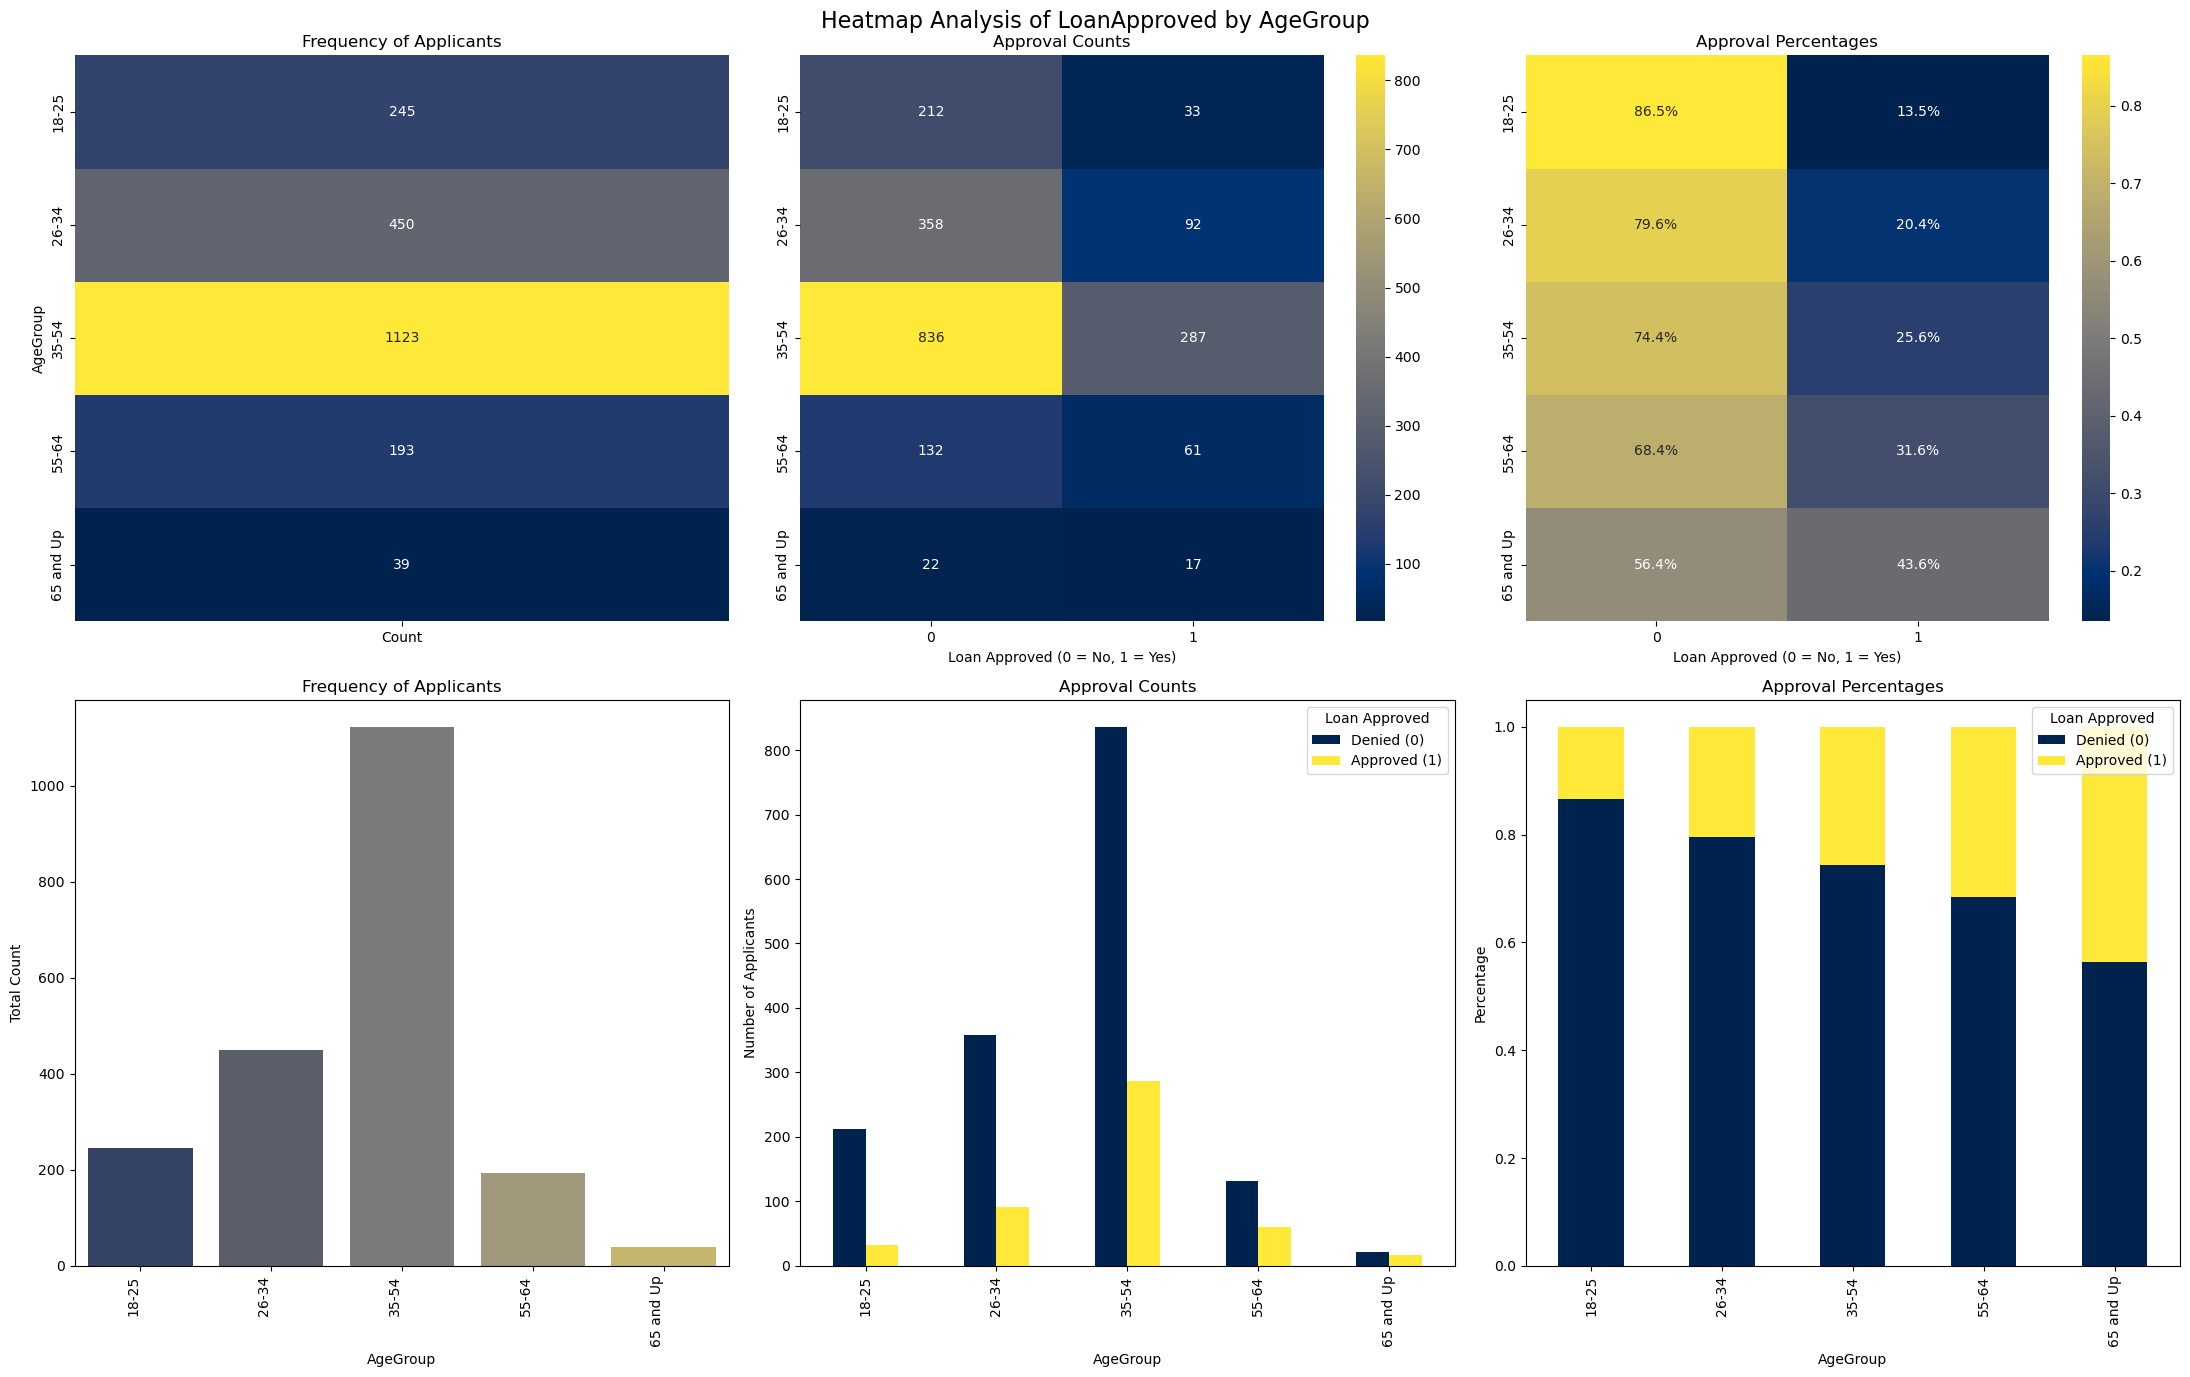

In [36]:
plot_categorical_vs_target(df, categorical_col='AgeGroup', target_col='LoanApproved')

Now we getting somewhere >:)

In [37]:
df['ApplicationDate'].max()

Timestamp('2072-10-02 00:00:00')

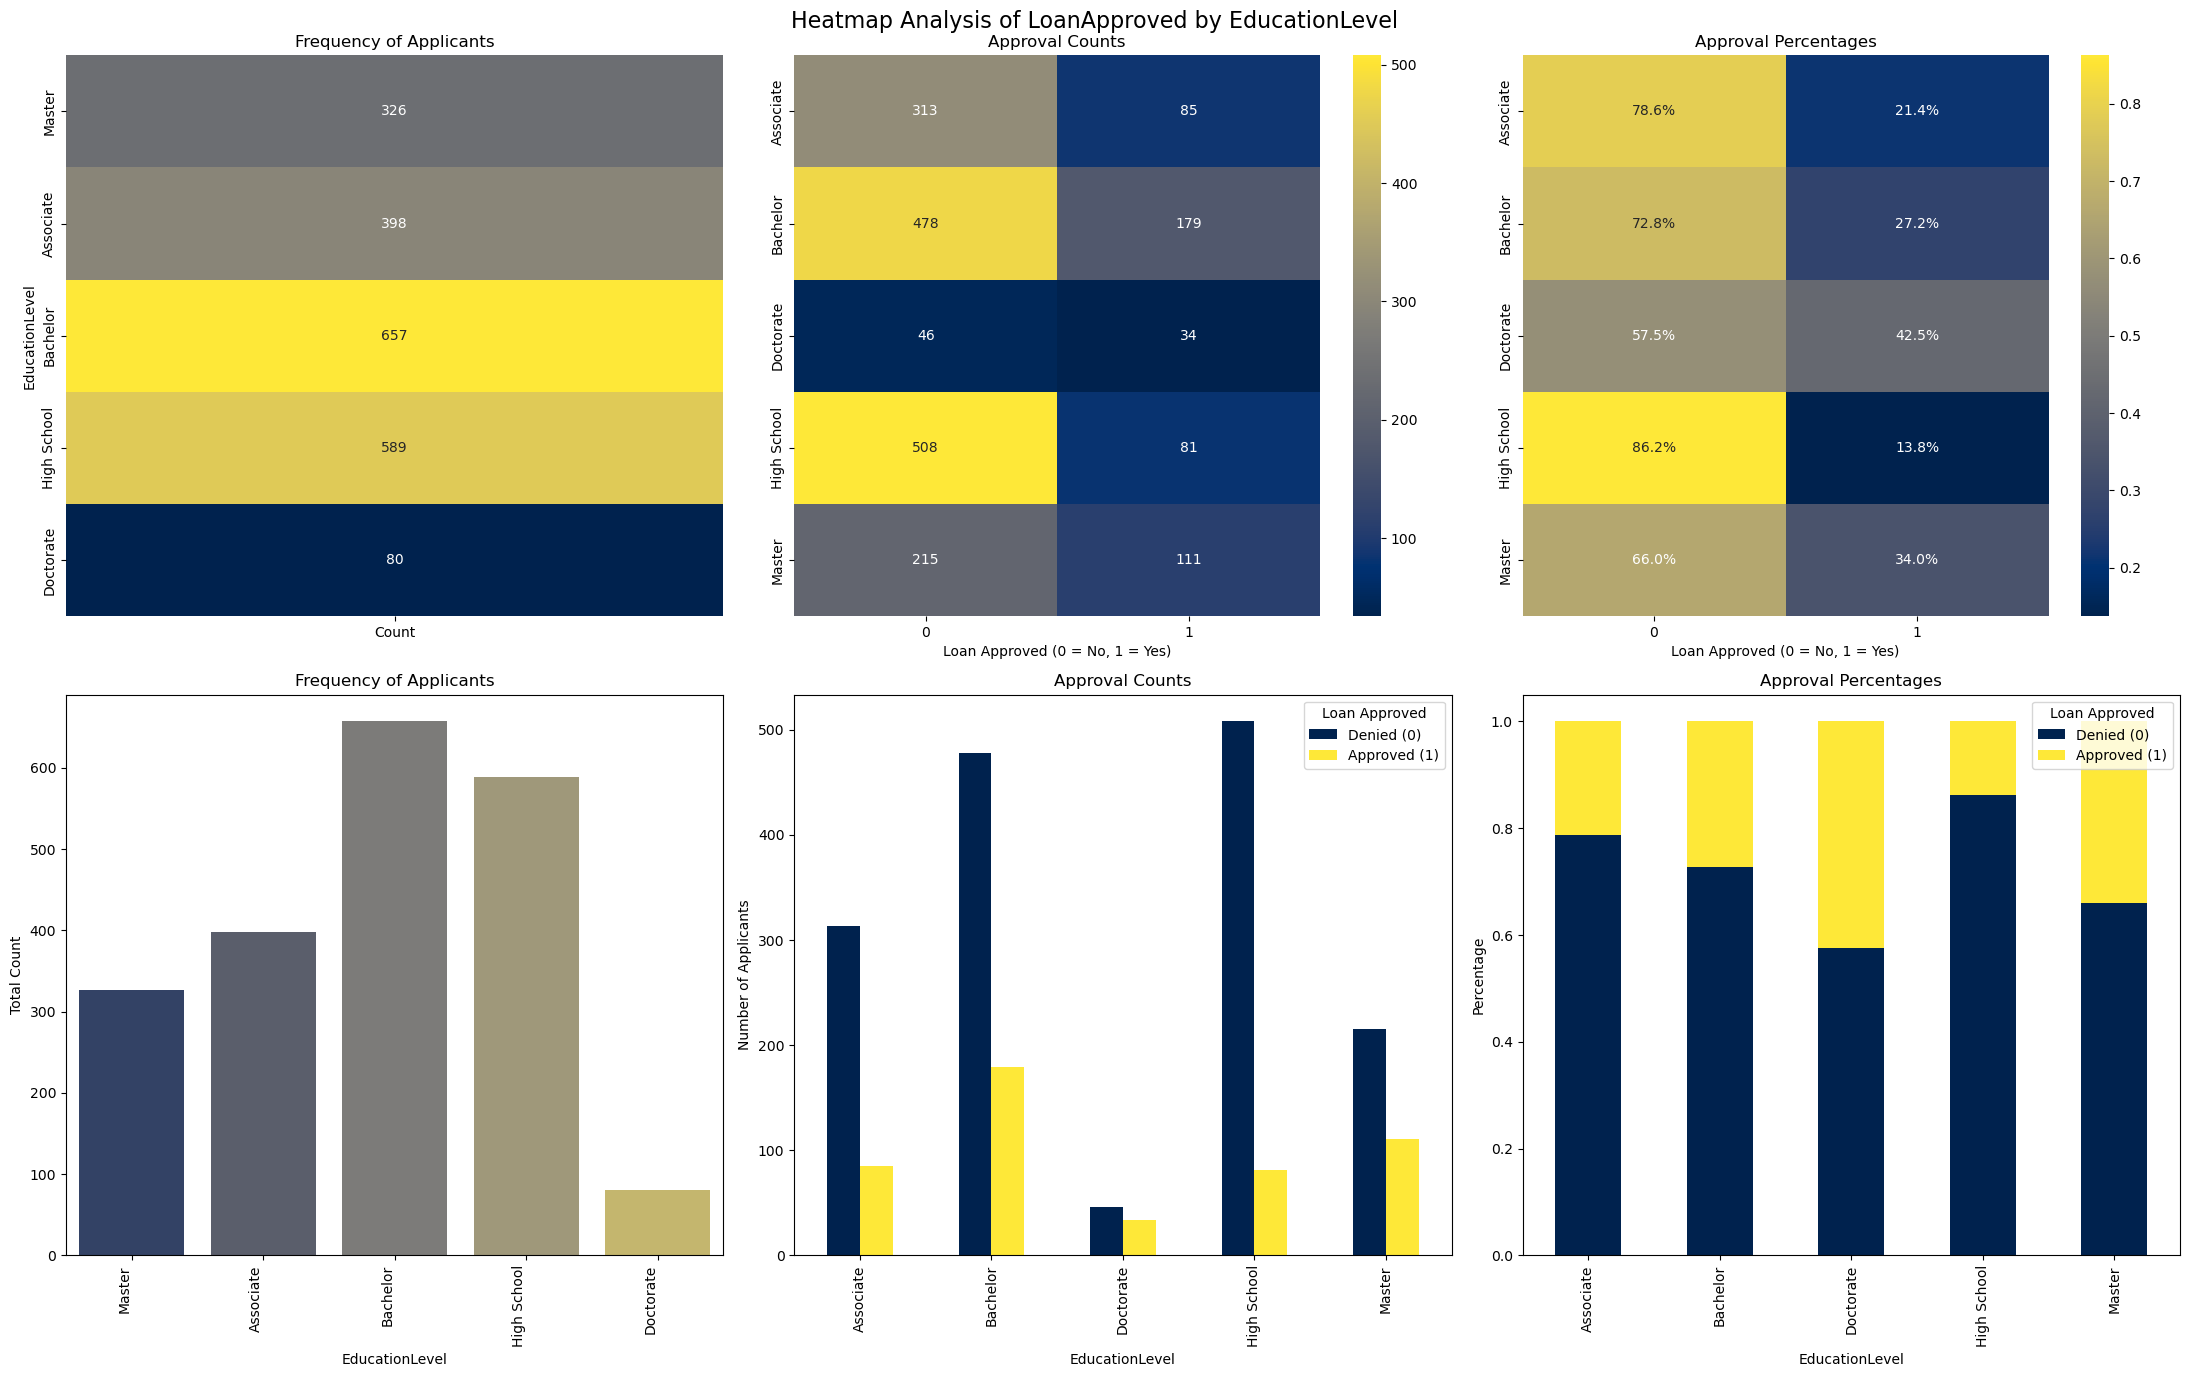

In [38]:
plot_categorical_vs_target(df, categorical_col='EducationLevel', target_col='LoanApproved')

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


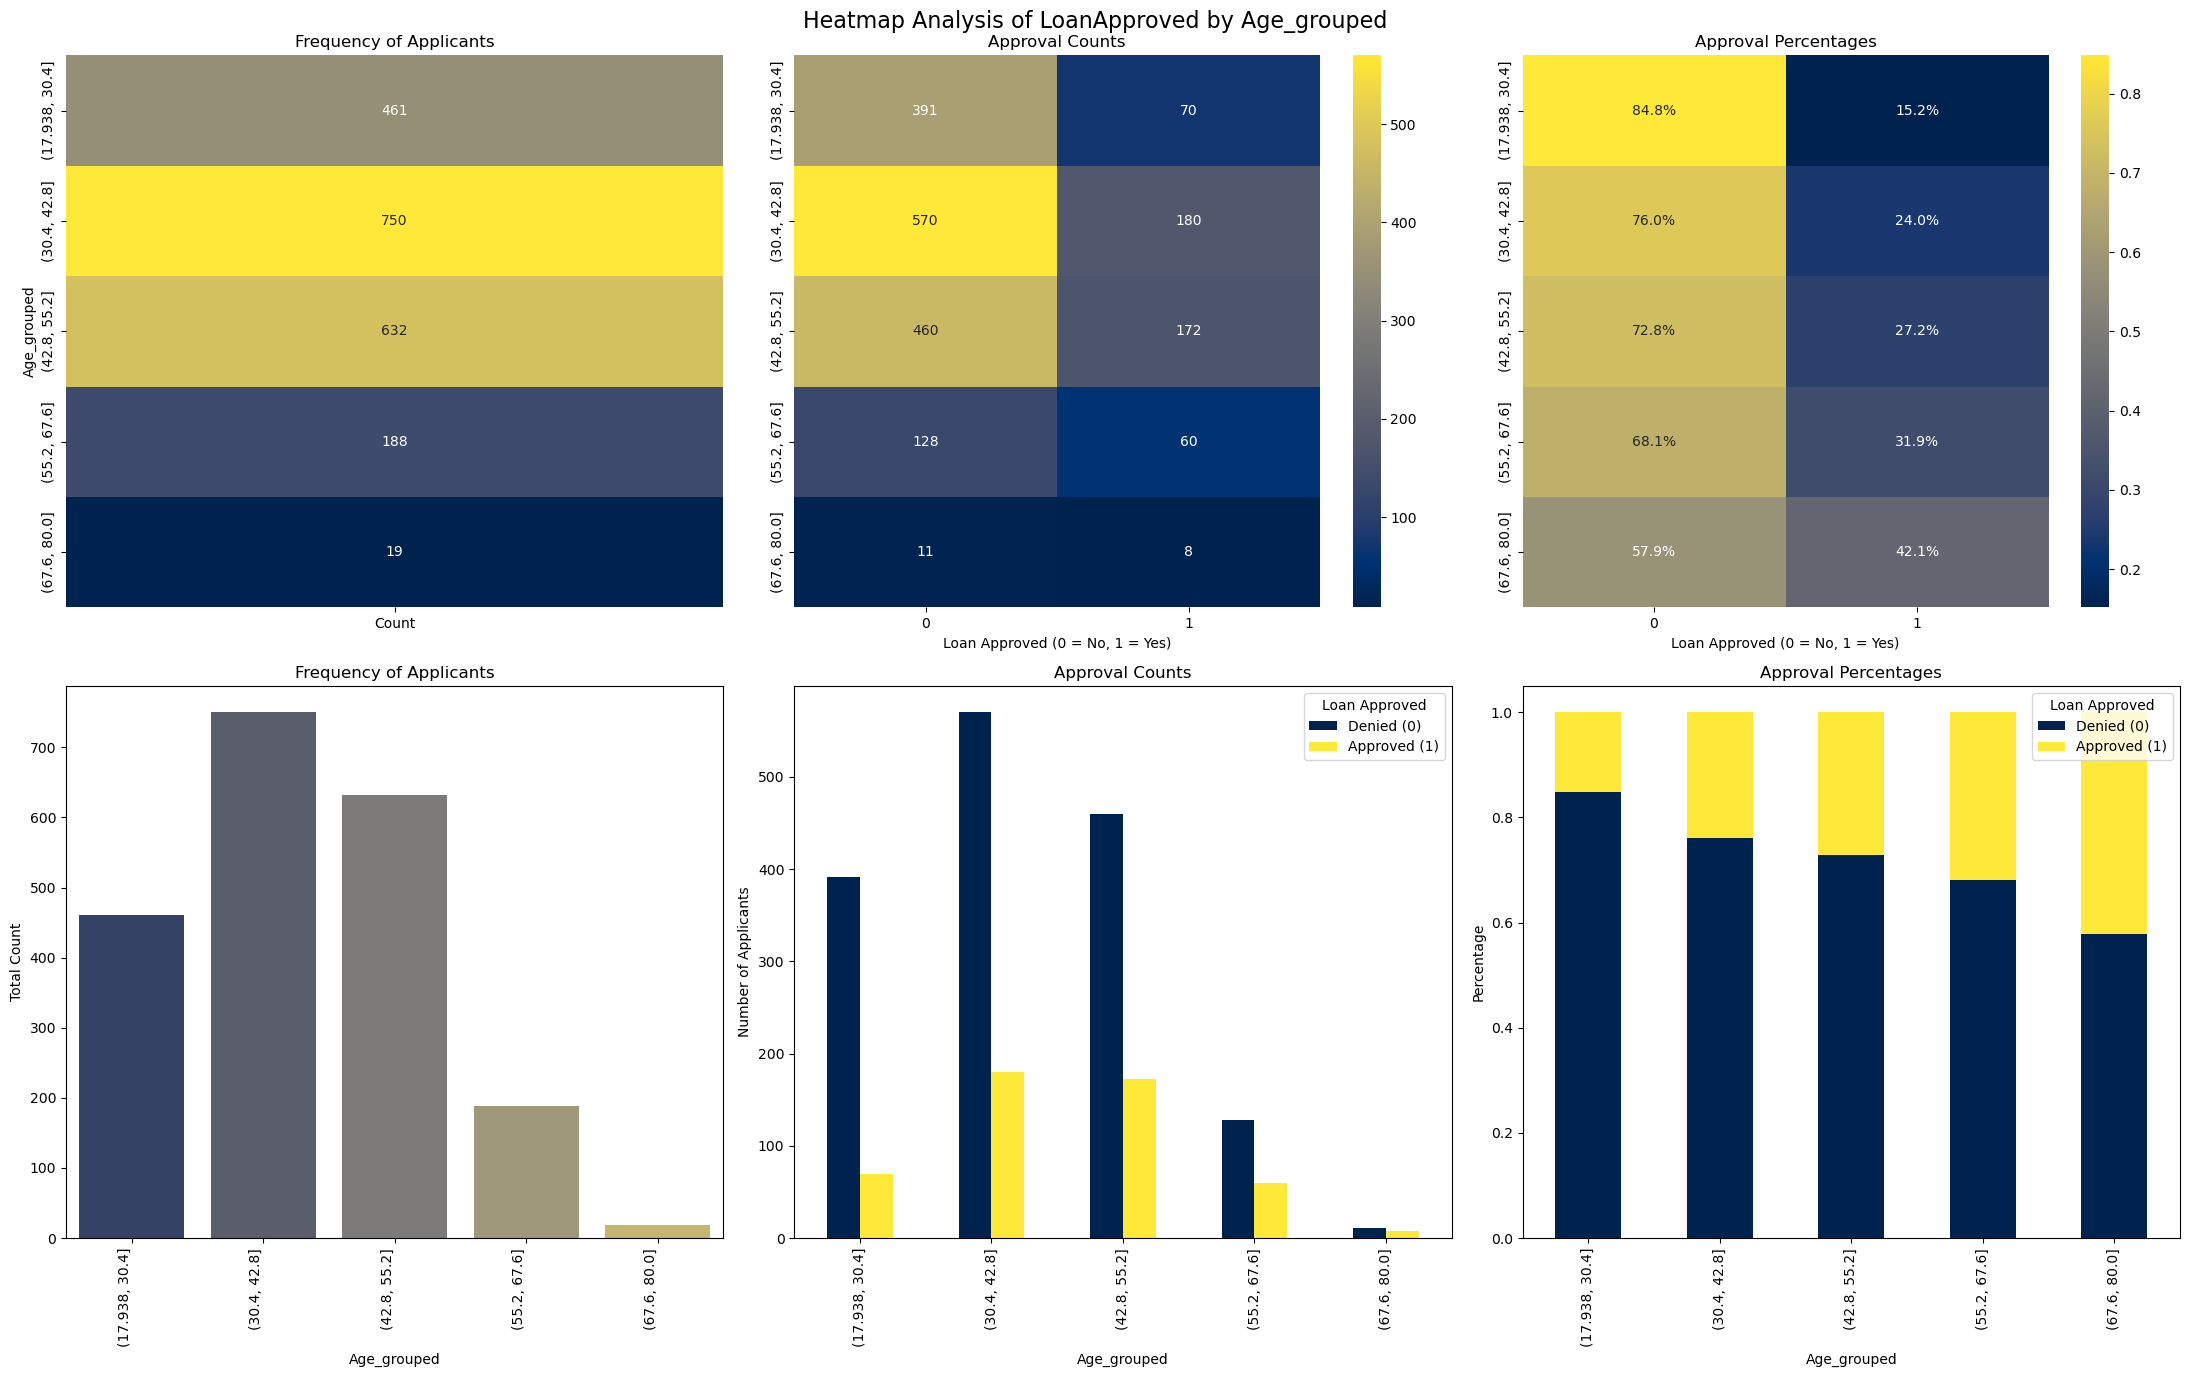

In [39]:
plot_numerical_vs_target(df, numerical_col='Age', target_col='LoanApproved', bins=5, how='cut')

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


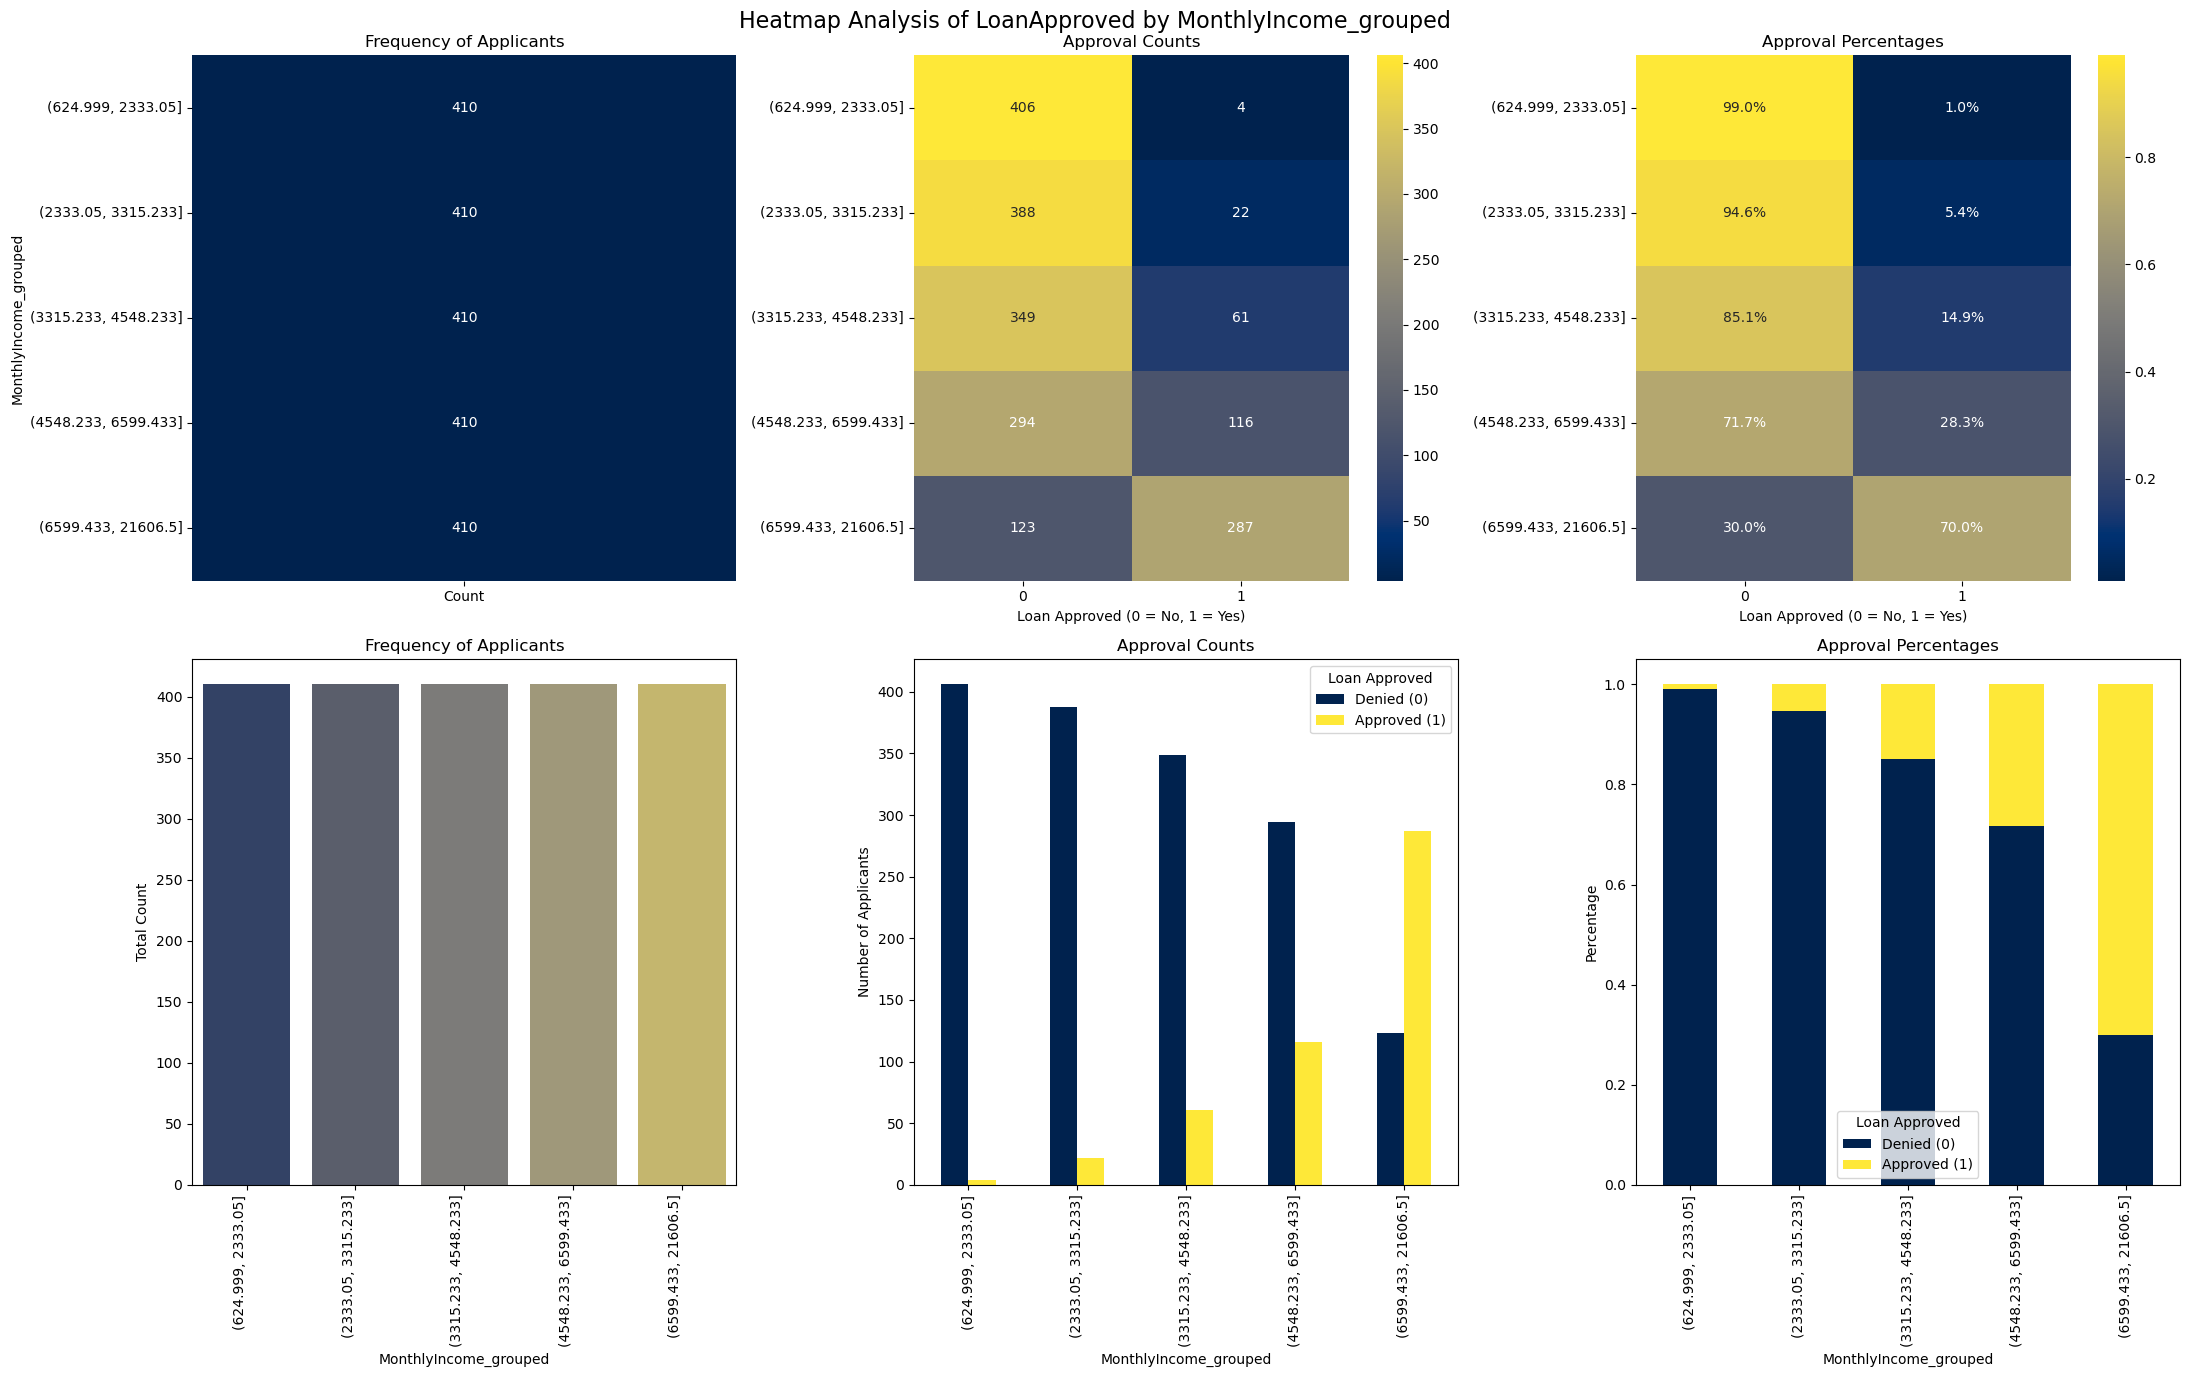

In [40]:
plot_numerical_vs_target(df, numerical_col='MonthlyIncome', target_col='LoanApproved', bins=5, how='qcut')

In [41]:
from scipy import stats

def find_CI(df, target_col, col, t_critical=2):
    # assuming binary target_col with values 0 and 1
    a = df[df[target_col] == 1]
    b = df[df[target_col] == 0]

    n_a = len(a)
    n_b = len(b)

    mean_a = a[col].mean()
    std_a = a[col].std(ddof=1)

    mean_b = b[col].mean()
    std_b = b[col].std(ddof=1)


    d_freedom = n_a + n_b - 2

    pooled_variance = (((n_a - 1) * std_a**2) + ((n_b - 1) * std_b**2)) / (d_freedom)

    standard_error = np.sqrt(pooled_variance * (1/n_a + 1/n_b))


    # # 98% Confidence interval
    # t_critical = t.ppf(0.99, deg_frd)
    # 95% Confidence interval ~ 2. we can also use t.ppf(0.975, d_freedom)

    margin_of_error = t_critical * standard_error

    ci_lower, ci_upper = ((mean_a - mean_b) - margin_of_error, (mean_a - mean_b) + margin_of_error)

    t_stat = (mean_a - mean_b) / standard_error

    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=d_freedom))

    return (ci_lower, ci_upper), (t_stat, p_value)

<h1>My part</h1>

<h3>Applicant's Financial Profile</h3>
    <ul>
        <li><b>AnnualIncome:</b> The total income the applicant earns in a year before taxes. (Nomerical)</li>
        <li><b>MonthlyIncome:</b> The total income the applicant earns in a month before taxes. (Nomerical)</li>
        <li><b>SavingsAccountBalance:</b> The total amount of money in the applicant's savings account. (Nomerical)</li>
        <li><b>CheckingAccountBalance:</b> The total amount of money in the applicant's checking account. (Nomerical)</li>
        <li><b>TotalAssets:</b> The total value of everything the applicant owns (cash, investments, property). (Nomerical)</li>
        <li><b>TotalLiabilities:</b> The total amount of debt the applicant owes (other loans, credit card debt). (Nomerical)</li>
        <li><b>NetWorth:</b> The applicant's total assets minus their total liabilities. (Nomerical)</li>
        <li><b>MonthlyDebtPayments:</b> The total amount the applicant pays towards existing debts each month.(Nomerical)</li>
    </ul>

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
from scipy.stats import boxcox, yeojohnson, shapiro
def describe_numeric_column(df, column):
    # histogram, KDE, boxplot for a numeric column.
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), 
                             gridspec_kw={'height_ratios': [3, 1]})
    
    # Histogram + KDE
    sns.histplot(df[column].dropna(), bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color='lightgreen')
    axes[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()
    print(df[column].describe(include='all'))
    print(f"Skewness: {df[column].skew():.2f}")
    print(f"Number of Missing Values: {df[column].isna().sum()}")

def normalize_nomerical_data(df, col):

    data = df[col].dropna()

    if (data <= 0).any():
        print(f"⚠️ Column '{col}' has non-positive values, applying Yeo-Johnson transformation.")
        transformed, lambda_val = yeojohnson(data)
        method = "Yeo-Johnson"
    else:
        transformed, lambda_val = boxcox(data)
        method = "Box-Cox"
    
    # Shapiro-Wilk test for normality
    stat, p = shapiro(transformed)
    
    print(f"{method} Lambda: {lambda_val:.4f}")
    print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")
    if p > 0.05:
        print("YESSSSSSSSSSSS, Data looks normally distributed (fail to reject H0).")
    else:
        print("NOOOOOOOOOOOOO, Data is not normally distributed (reject H0).")
    
    # Plot distribution
    plt.figure(figsize=(8,5))
    sns.histplot(transformed, kde=True, color="skyblue")
    plt.title(f"Distribution of {col} after {method}")
    plt.show()
    
    return transformed, lambda_val, method

In [58]:
fin_df = df[['AnnualIncome', 'MonthlyIncome', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth', 'MonthlyDebtPayments', 'LoanApproved']].copy()

In [59]:
fin_df.head()

,AnnualIncome,MonthlyIncome,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,NetWorth,MonthlyDebtPayments,LoanApproved
0,63052,5254.333333,3747,3265,111995,203370,1409,433.0,0
1,62117,5176.416667,7487,256,136992,30664,106328,214.0,0
2,32448,2704.000000,1662,648,14204,31564,8626,383.0,0
3,32182,2681.833333,1861,3094,120905,24161,96744,405.0,0
4,77191,6432.583333,11373,466,32054,15742,16312,599.0,0


In [45]:
fin_df.dtypes

AnnualIncome                int64
MonthlyIncome             float64
SavingsAccountBalance       int64
CheckingAccountBalance      int64
TotalAssets                 int64
TotalLiabilities            int64
NetWorth                    int64
MonthlyDebtPayments       float64
LoanApproved                int64
dtype: object

-------------------------------------------

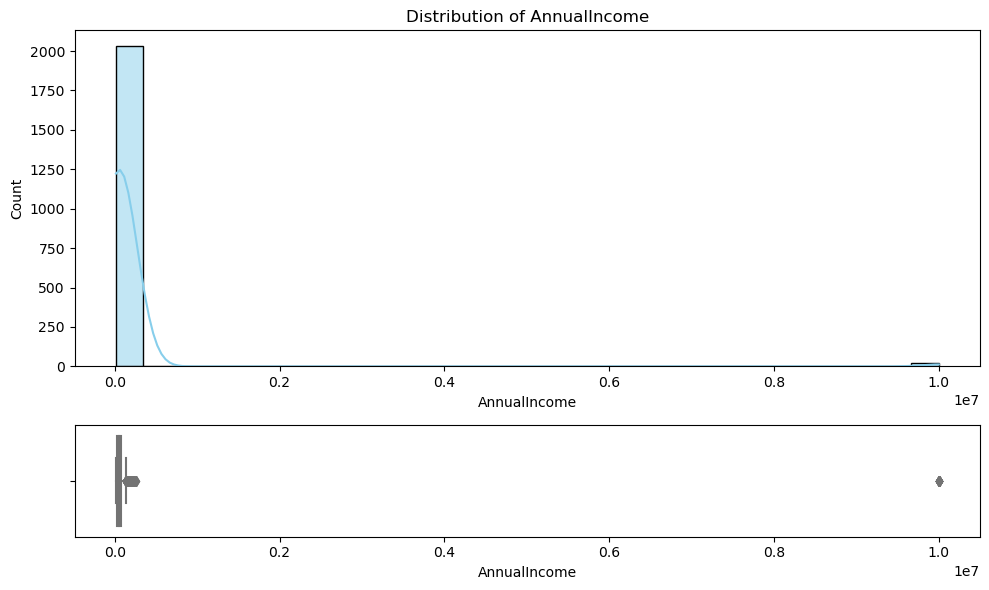

count    2.050000e+03
mean     1.558224e+05
std      9.780950e+05
min      1.500000e+04
25%      3.274900e+04
50%      4.926900e+04
75%      7.434200e+04
max      1.000000e+07
Name: AnnualIncome, dtype: float64
Skewness: 9.96
Number of Missing Values: 0


In [67]:
describe_numeric_column(fin_df, column='AnnualIncome')

Distribution : Possibly right-skewed. 
Outliers at 1e7 and heavily effecting the plots and interputation

No missing value here. Let's deal with outliers

In [68]:
fin_df[fin_df['AnnualIncome'] == 1e7]

,AnnualIncome,MonthlyIncome,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,NetWorth,MonthlyDebtPayments,LoanApproved
45,10000000,9835.666667,2730,11827,14557,79983,10650,585.0,0
61,10000000,2911.916667,3614,2948,128613,16228,112385,468.0,0
84,10000000,5008.750000,7305,840,39431,14299,25132,376.0,0
122,10000000,4227.083333,2475,1238,16326,30022,10751,1150.0,1
263,10000000,8238.000000,1906,1893,11543,24263,3658,236.0,1
295,10000000,6960.250000,2226,1385,13603,23303,9201,490.0,0
548,10000000,4519.250000,4042,1127,112103,64569,47534,993.0,0
635,10000000,20083.833333,6291,2982,66234,20399,45835,232.0,1
672,10000000,3537.083333,4904,11649,243811,170667,73144,415.0,0
781,10000000,6438.666667,1172,1303,171105,5051,166054,220.0,0


In [69]:
fin_df[fin_df['AnnualIncome'] == 1e7]['LoanApproved'].mean()

0.25

We can clearly see that despite being the maximum annualincome, the loan approval is not that great (25%) which possibly could indicate data entry error. Let's see if we can use Monthly payment * 12 as Annual income

In [70]:
outlier_mask = df['AnnualIncome'] == 1e7
non_missing = df[~outlier_mask]
non_missing['Calculated_Annual'] = non_missing['MonthlyIncome'] * 12
non_missing['IncomeDiff'] = non_missing['AnnualIncome'] - non_missing['Calculated_Annual']

non_missing[['AnnualIncome', 'Calculated_Annual']].describe()

,AnnualIncome,Calculated_Annual
count,2030.000000,2030.000000
mean,58835.414778,56980.067488
std,38223.925500,37742.213262
min,15000.000000,7500.000000
25%,32684.750000,30990.500000
50%,48939.000000,46197.500000
75%,72841.750000,70977.500000
max,259278.000000,259278.000000


Very close indeed. We will continue by replacing outliers with monthlyincome * 12

In [71]:
fin_df.loc[outlier_mask, 'AnnualIncome'] = fin_df.loc[outlier_mask, 'MonthlyIncome'] * 12.0

Now let's try again

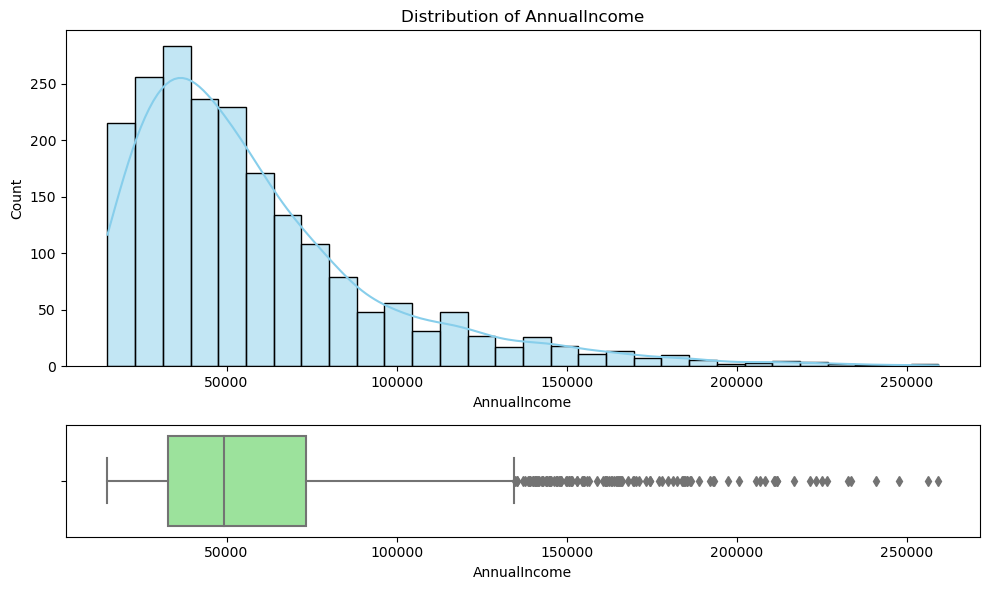

count      2050.000000
mean      58951.133171
std       38350.455987
min       15000.000000
25%       32693.000000
50%       49117.500000
75%       73500.750000
max      259278.000000
Name: AnnualIncome, dtype: float64
Skewness: 1.70
Number of Missing Values: 0


In [72]:
describe_numeric_column(fin_df, column='AnnualIncome')

Much better. Now let's normalize it

Box-Cox Lambda: -0.0945
Shapiro-Wilk Test: Statistic=0.9929, p-value=0.0000
NOOOOOOOOOOOOO, Data is not normally distributed (reject H0).


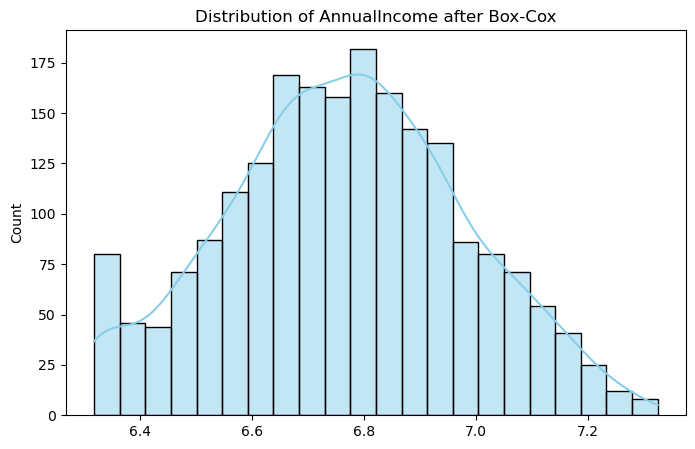

In [73]:
normalized_data, lambda_val, method = normalize_nomerical_data(fin_df, col='AnnualIncome')

------------------

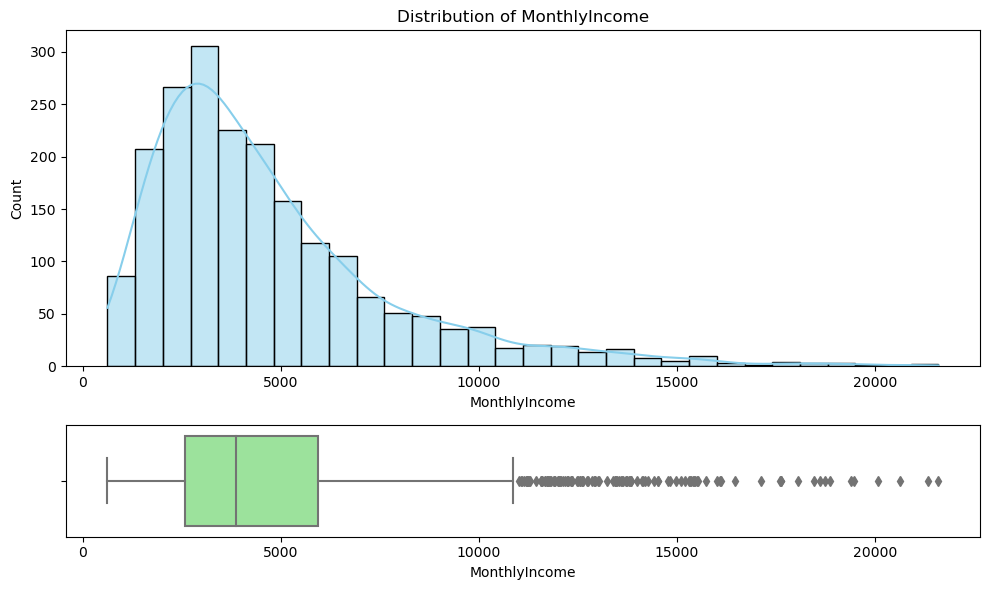

count     2050.000000
mean      4759.490569
std       3156.760304
min        625.000000
25%       2586.062500
50%       3869.750000
75%       5931.875000
max      21606.500000
Name: MonthlyIncome, dtype: float64
Skewness: 1.72
Number of Missing Values: 0


In [74]:
describe_numeric_column(fin_df, column='MonthlyIncome')

Okay Seems like everything is fine.
Right-Skewed distribution. 

Box-Cox Lambda: -0.0462
Shapiro-Wilk Test: Statistic=0.9969, p-value=0.0003
NOOOOOOOOOOOOO, Data is not normally distributed (reject H0).


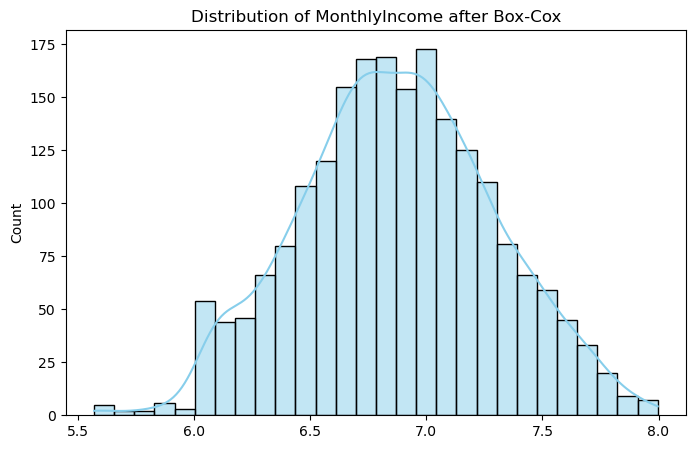

In [75]:

normalized_data, lambda_val, method = normalize_nomerical_data(fin_df, col='MonthlyIncome')

-----------------

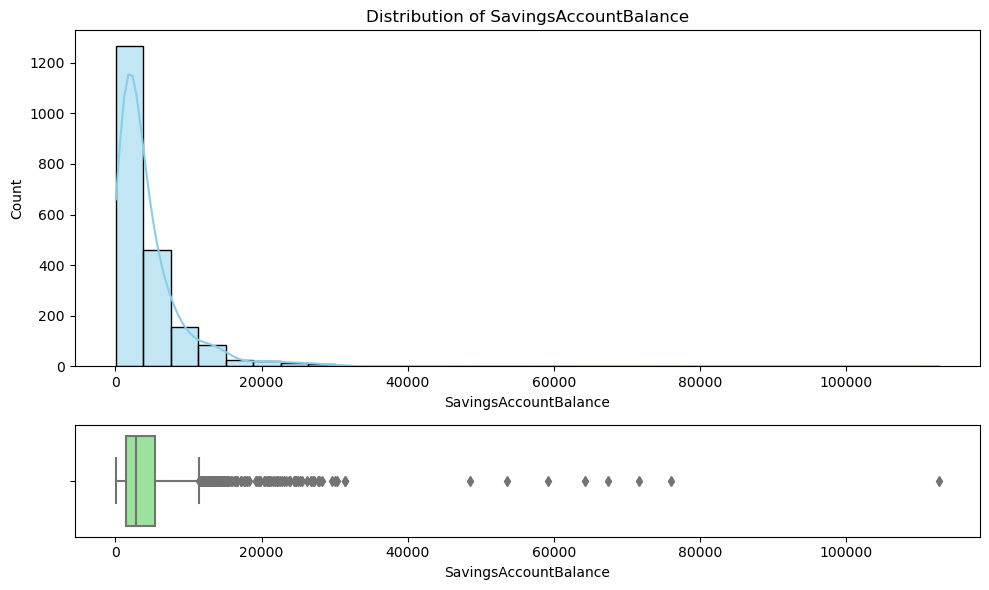

count      2050.000000
mean       4645.260488
std        6229.288152
min          73.000000
25%        1488.750000
50%        2866.000000
75%        5485.750000
max      112659.000000
Name: SavingsAccountBalance, dtype: float64
Skewness: 6.49
Number of Missing Values: 0


In [76]:
describe_numeric_column(fin_df, column='SavingsAccountBalance')

Okay we have yet another column with some outliers not like before but let's see.

In [77]:
fin_df[fin_df['SavingsAccountBalance'] > 30000]

,AnnualIncome,MonthlyIncome,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,NetWorth,MonthlyDebtPayments,LoanApproved
8,15000.0,1250.000000,64290,271,64561,23449,41112,525.0,0
80,49287.0,4107.250000,31470,409,146154,26868,119286,437.0,0
270,41267.0,3438.916667,53574,2919,56493,7478,49015,1020.0,0
301,107133.0,8927.750000,31351,979,49396,5933,43463,610.0,0
311,52106.0,4342.166667,30050,11417,41467,18839,22628,1289.0,0
586,63024.0,5252.000000,59246,729,59975,50747,9228,499.0,0
1083,45385.0,3782.083333,71654,1407,73061,18903,54158,383.0,0
1349,57552.0,4796.000000,67358,1357,68715,35693,33022,834.0,0
1648,67333.0,5611.083333,76062,110,76172,23314,52858,254.0,0
1714,15541.0,1295.083333,30288,1943,76193,36991,39202,157.0,0


Interesting only one approved loan, this may indicate a connection

Box-Cox Lambda: 0.0320
Shapiro-Wilk Test: Statistic=0.9987, p-value=0.1076
YESSSSSSSSSSSS, Data looks normally distributed (fail to reject H0).


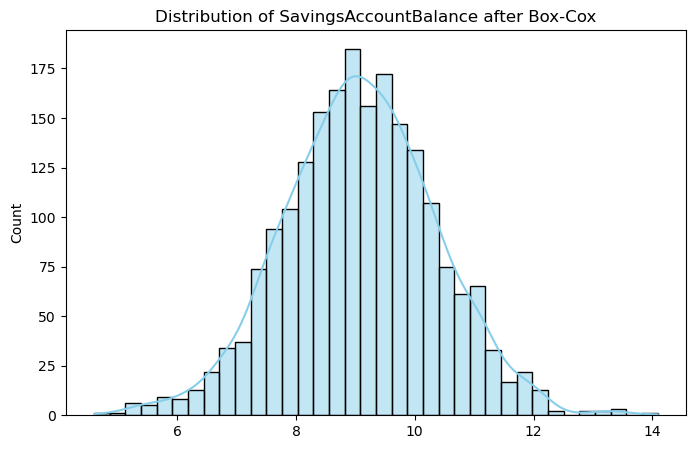

In [78]:
normalized_data, lambda_val, method = normalize_nomerical_data(fin_df, col='SavingsAccountBalance')

----------------------------------------------------------

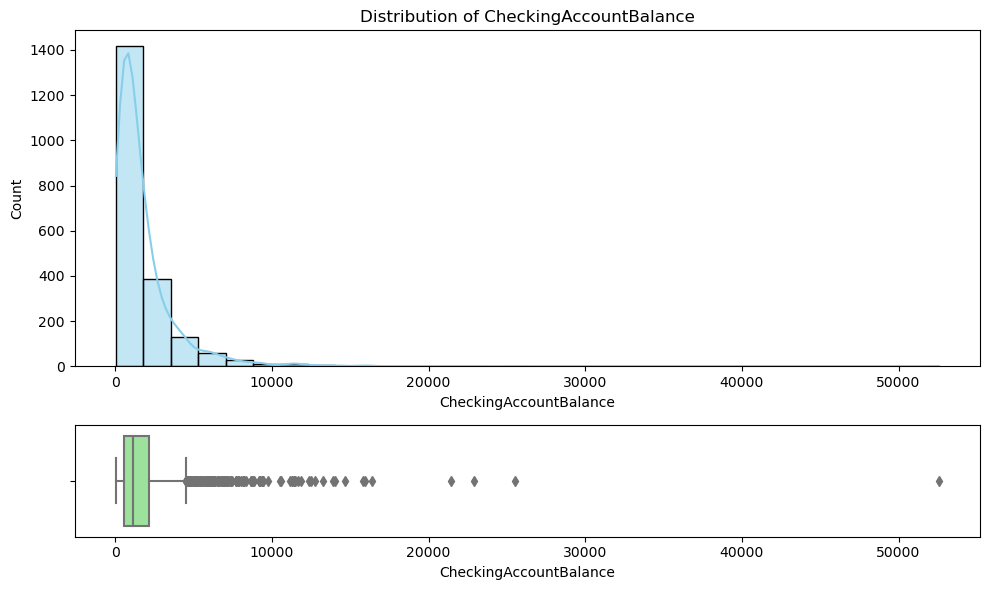

count     2050.000000
mean      1795.571707
std       2404.462650
min         45.000000
25%        553.250000
50%       1123.500000
75%       2130.750000
max      52572.000000
Name: CheckingAccountBalance, dtype: float64
Skewness: 7.21
Number of Missing Values: 0


In [79]:
describe_numeric_column(fin_df, column='CheckingAccountBalance')

As with SavingAccountBalance this one is VERY right-skewed let's see if anything is wrong with data or maybe a hint.

In [80]:
fin_df[fin_df['SavingsAccountBalance'] > 20000]

,AnnualIncome,MonthlyIncome,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,NetWorth,MonthlyDebtPayments,LoanApproved
8,15000.0,1250.000000,64290,271,64561,23449,41112,525.0,0
43,39705.0,3308.750000,21054,1307,145195,18593,126602,664.0,0
80,49287.0,4107.250000,31470,409,146154,26868,119286,437.0,0
82,42771.0,3564.250000,27792,406,28198,98402,9999,232.0,1
179,30675.0,2556.250000,20431,1260,31104,7404,23700,156.0,0
181,46480.0,2367.166667,21602,2067,39793,12666,27127,280.0,0
206,41920.0,3493.333333,29615,352,49943,59153,9547,369.0,0
214,50012.0,4167.666667,23326,1585,63005,12401,50604,355.0,1
261,101068.0,8422.333333,24606,886,70728,34629,36099,319.0,0
270,41267.0,3438.916667,53574,2919,56493,7478,49015,1020.0,0


Nothing seems to be particularly odd in here. We will have to wait and see. how about some normalization

Box-Cox Lambda: 0.0193
Shapiro-Wilk Test: Statistic=0.9995, p-value=0.8656
YESSSSSSSSSSSS, Data looks normally distributed (fail to reject H0).


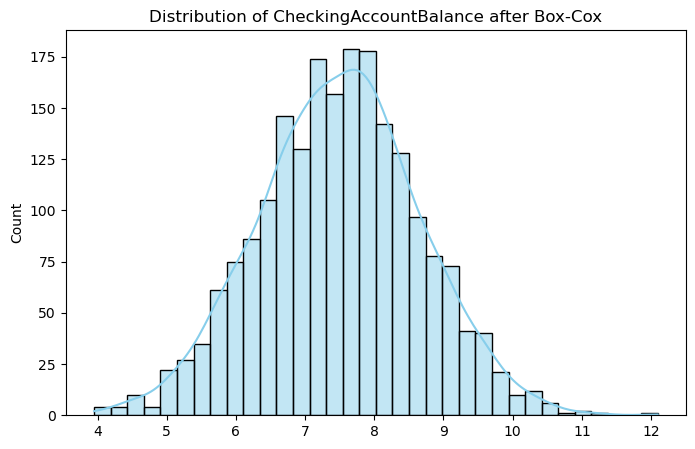

In [81]:
normalized_data, lambda_val, method = normalize_nomerical_data(fin_df, col='CheckingAccountBalance')

------------------

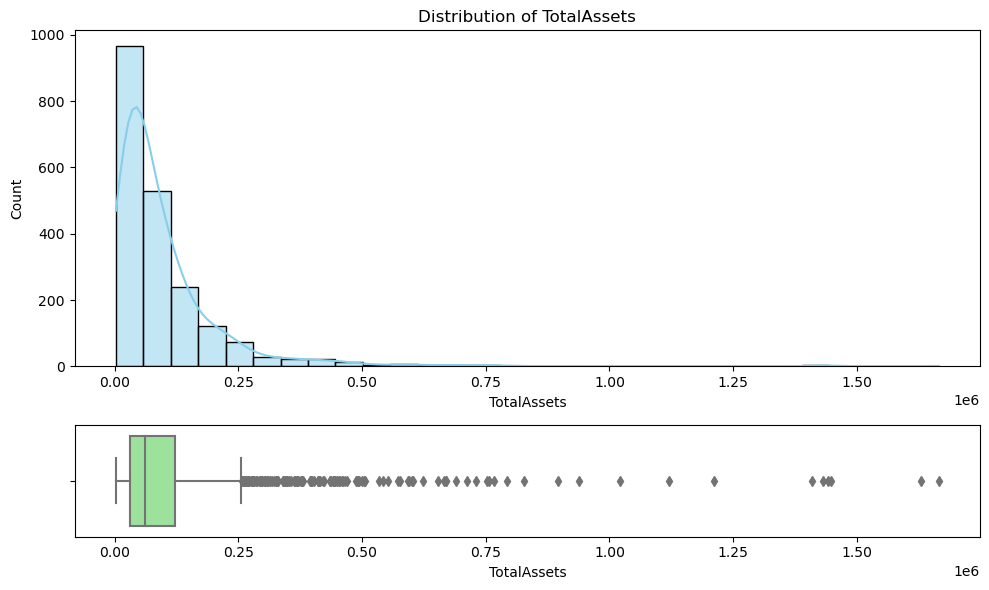

count    2.050000e+03
mean     1.024769e+05
std      1.370588e+05
min      2.760000e+03
25%      3.185025e+04
50%      6.231550e+04
75%      1.218170e+05
max      1.665558e+06
Name: TotalAssets, dtype: float64
Skewness: 5.15
Number of Missing Values: 0


In [82]:
describe_numeric_column(fin_df, column='TotalAssets')

Okay, Like before we have right-skewed distribution. Let's do the norm

Box-Cox Lambda: -0.0386
Shapiro-Wilk Test: Statistic=0.9991, p-value=0.4654
YESSSSSSSSSSSS, Data looks normally distributed (fail to reject H0).


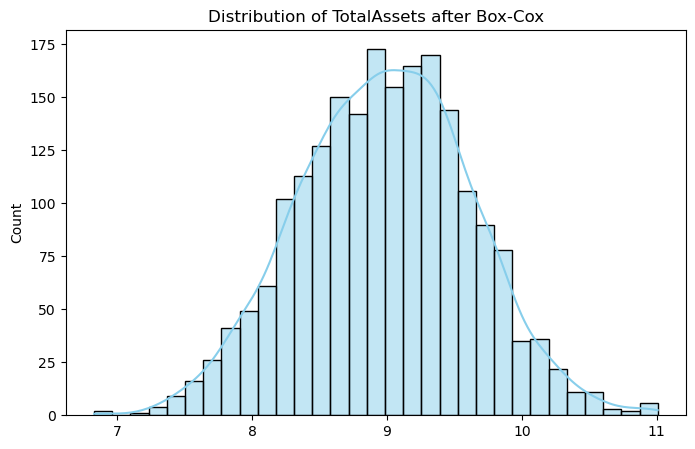

In [83]:
normalized_data, lambda_val, method = normalize_nomerical_data(fin_df, col='TotalAssets')

--------------

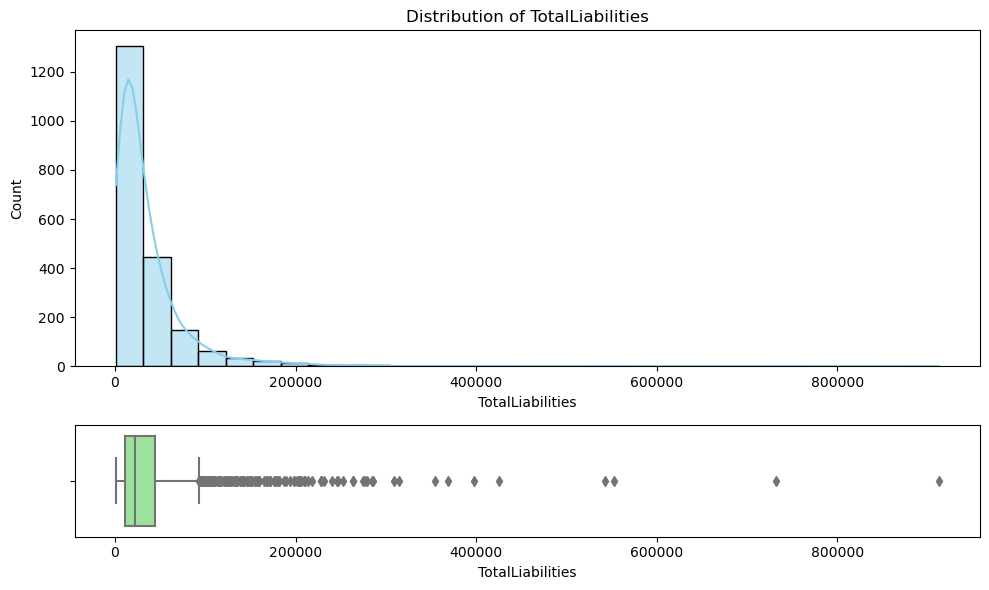

count      2050.000000
mean      36951.705366
std       51809.558363
min        1076.000000
25%       11293.250000
50%       22000.500000
75%       43934.750000
max      912238.000000
Name: TotalLiabilities, dtype: float64
Skewness: 6.32
Number of Missing Values: 0


In [84]:
describe_numeric_column(fin_df, column='TotalLiabilities')

Just like before 

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


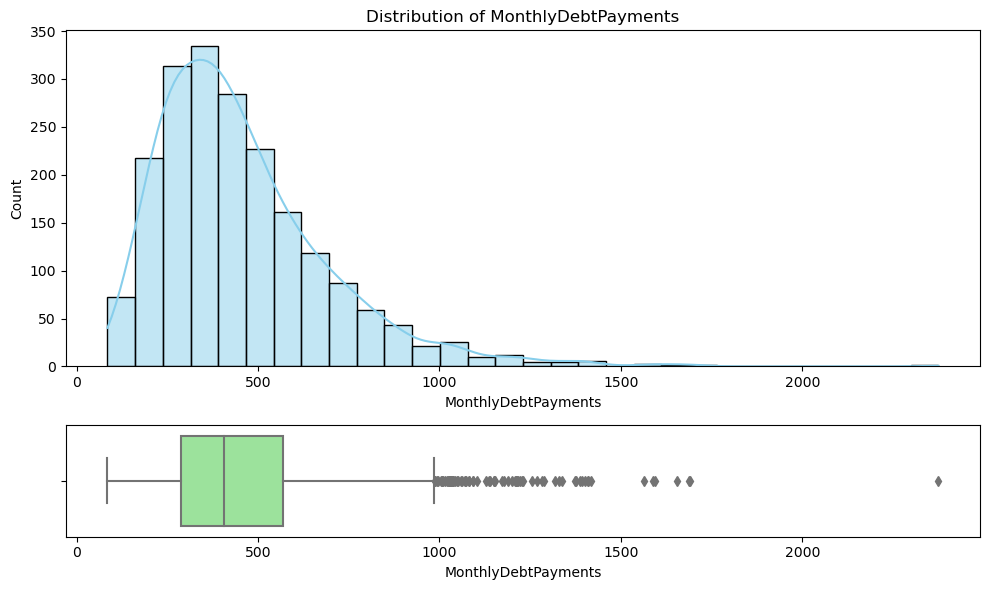

count    2009.000000
mean      457.295669
std       239.521001
min        85.000000
25%       289.000000
50%       405.000000
75%       568.000000
max      2375.000000
Name: MonthlyDebtPayments, dtype: float64


In [ ]:
describe_numeric_column(fin_df, column='MonthlyDebtPayments')

In [ ]:
fin_df['MonthlyDebtPayments'].isna().sum() 

41

Looks like we have some missing data

In [ ]:
missing_mask = fin_df['MonthlyDebtPayments'].isna()

missing_approval_rate = df['LoanApproved'].mean()
not_missing_approval_rate = df[~missing_mask]['LoanApproved'].mean()


print(f"Approval rate with missing variables: {missing_approval_rate:.2%}")
print(f"Approval rate without missing variables: {not_missing_approval_rate:.2%}")

Approval rate with missing variables: 23.90%
Approval rate without missing variables: 23.84%


As we can see here there some difference when removing missing data so we cannot drop the missing columns.
Due to the Skewness of the histplot we can fill the missing data with median

In [ ]:
fin_df['MonthlyDebtPayments']  = fin_df['MonthlyDebtPayments'].fillna(fin_df['MonthlyDebtPayments'].median())

In [ ]:
# sns.histplot(data=fin_df, x='MonthlyDebtPayments', hue='LoanApproved', kde=True, element="step", stat="density", common_norm=False, palette="Set1")